### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
print(x)

[[5.74994814e-01 5.47425049e-01 8.31057202e-01 8.02745109e-02
  6.97661548e-01]
 [1.10082038e-01 8.87619189e-01 8.94114753e-01 9.47375346e-01
  2.09701564e-01]
 [4.70031717e-01 4.14664147e-01 8.80748538e-02 2.85671797e-01
  9.97011333e-01]
 [3.59630417e-01 9.03215283e-01 3.29792511e-01 9.43323848e-01
  6.12536695e-01]
 [2.64949872e-01 3.29131893e-01 6.62633356e-01 3.98849618e-01
  1.88103339e-02]
 [4.73615919e-01 7.85941891e-01 2.05389961e-01 6.17855097e-01
  2.04902090e-01]
 [4.87539955e-01 5.73471625e-01 4.88526267e-01 5.44192679e-01
  7.76211339e-01]
 [3.54227687e-01 6.82966868e-01 7.52769892e-01 1.07776425e-01
  5.51713337e-01]
 [9.38315886e-01 4.23506404e-01 7.10939151e-01 4.43978775e-01
  7.97312778e-01]
 [2.18722128e-02 5.35926322e-02 7.79100038e-01 7.97480763e-01
  4.81505448e-01]
 [6.36545280e-01 3.59999619e-01 4.07476929e-04 8.16193728e-01
  3.28925746e-01]
 [4.54531020e-01 2.04985184e-02 7.93925081e-01 7.46152904e-01
  3.90120037e-01]
 [5.89625555e-01 7.34974884e-01 8.336381

In [5]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

0.6639329733836563
0.6613398837119375
0.6578191107750503
0.6555826148995578
0.6519224593577099
0.6482154512059677
0.6450888630687676
0.6421279936047815
0.6379473194717357


## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [9]:
data = pd.read_csv('autos.csv')

In [10]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

<Axes: >

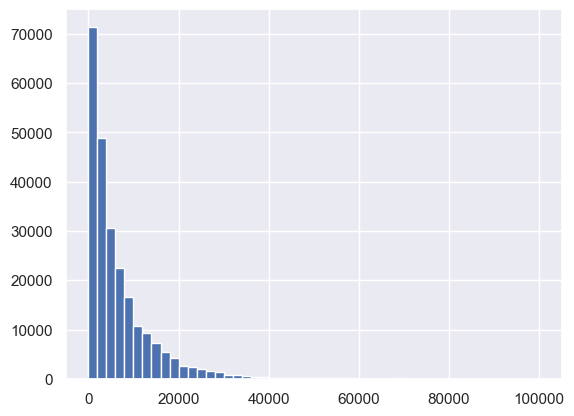

In [11]:
data['price'].hist(bins=50)

In [12]:
data['log_price'] = np.log(data['price'])

<Axes: >

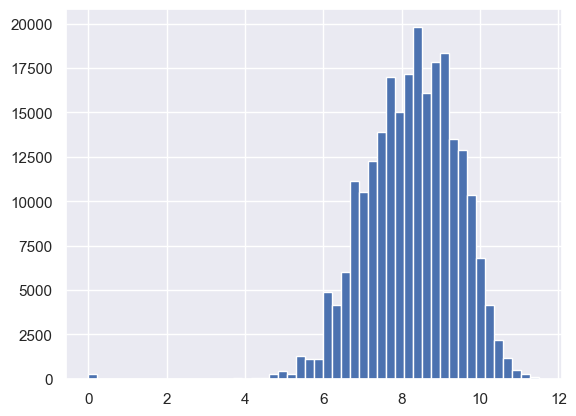

In [13]:
data['log_price'].hist(bins=50)

<Axes: >

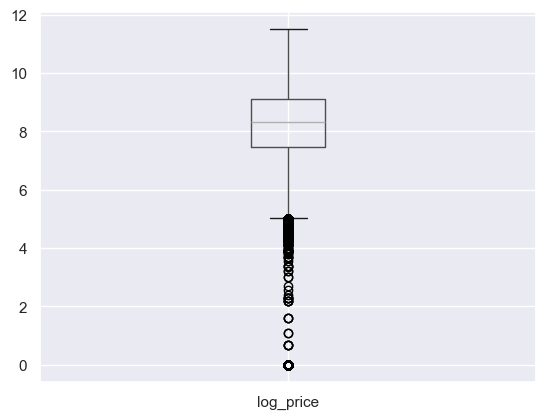

In [14]:
data.boxplot('log_price')

In [15]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
data = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

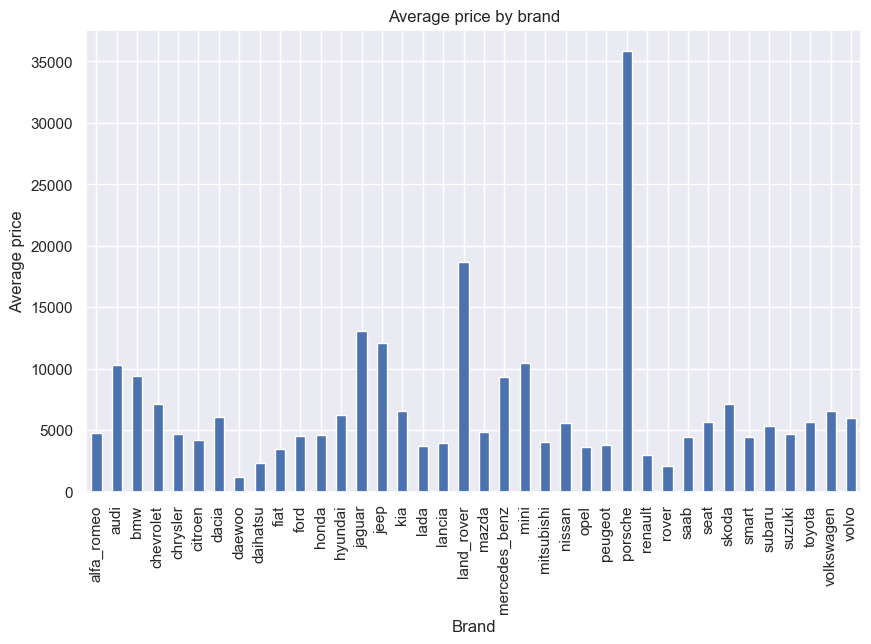

In [16]:
brand_log_price = data.groupby('brand')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average price')
plt.title('Average price by brand')
plt.show()

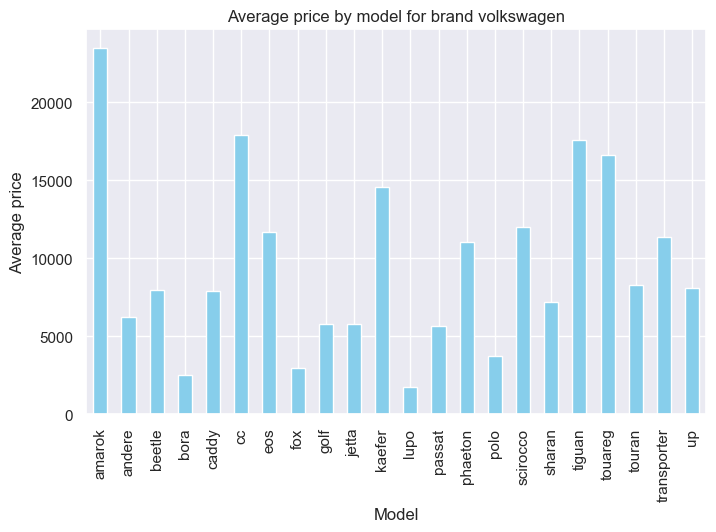

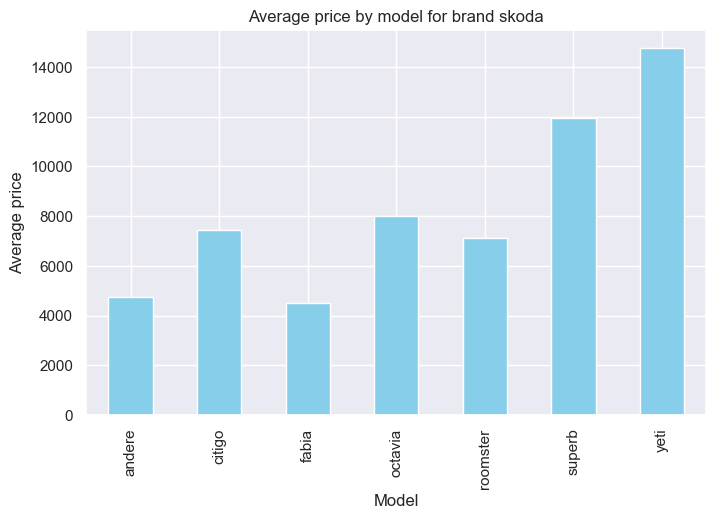

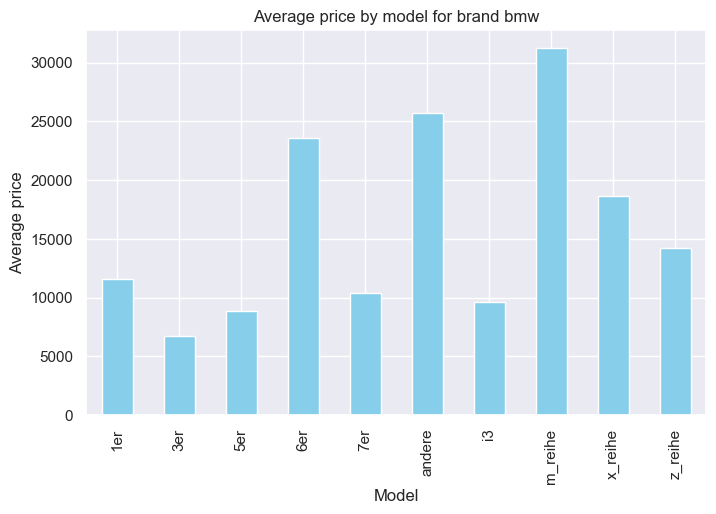

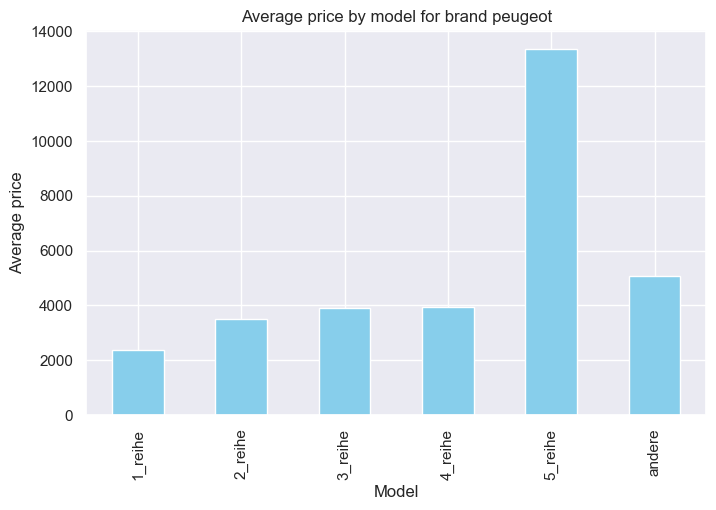

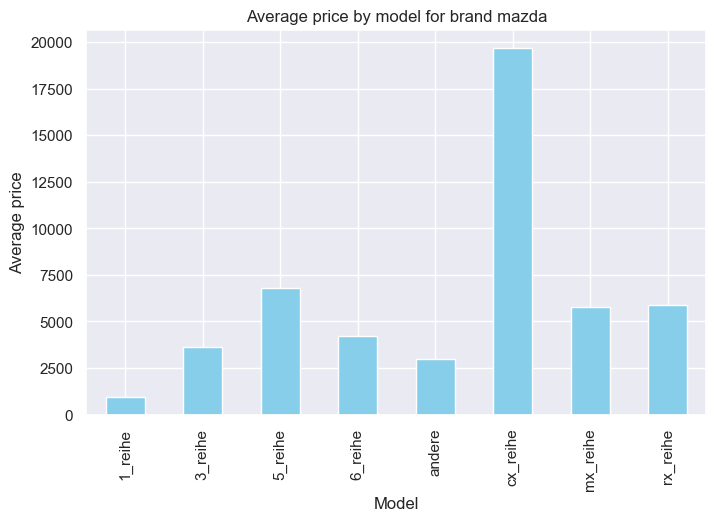

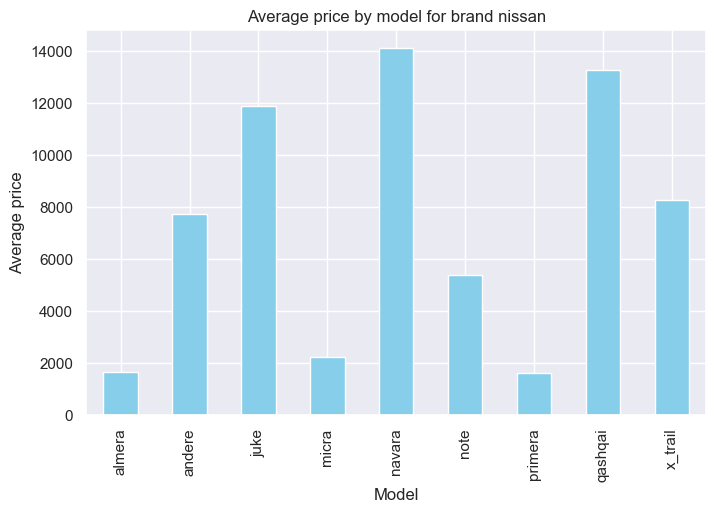

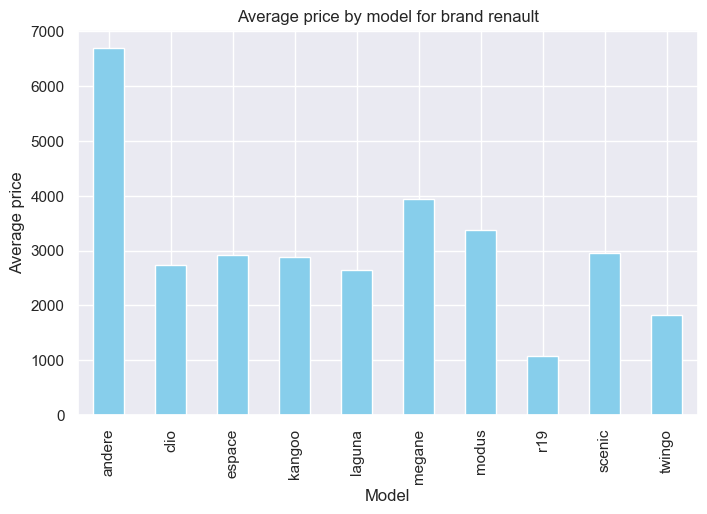

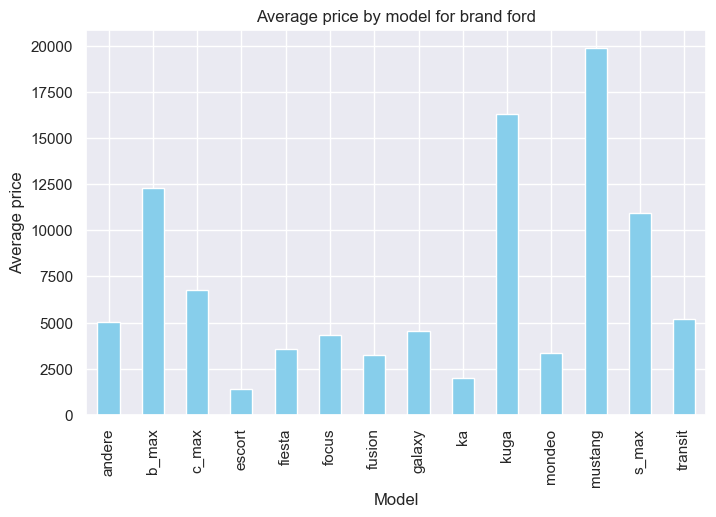

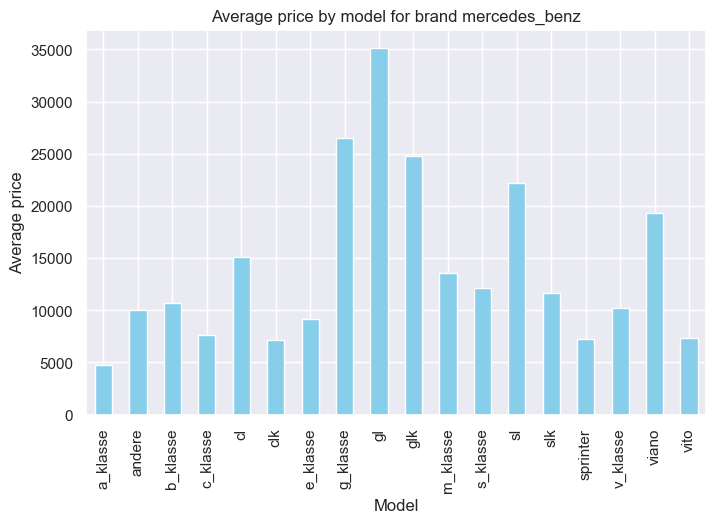

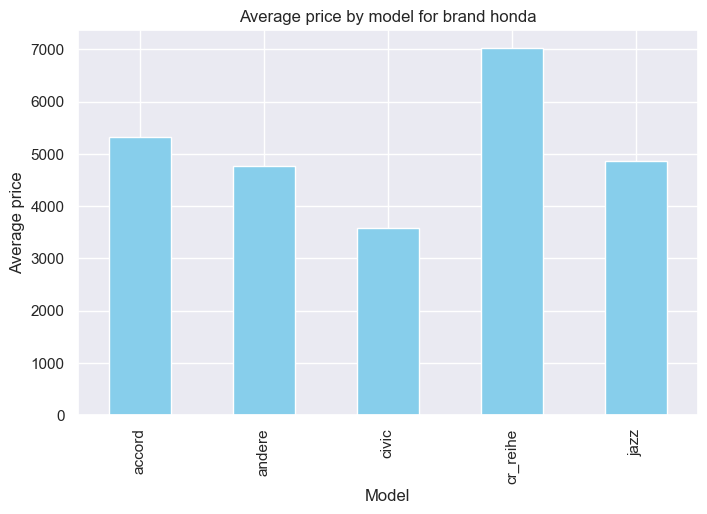

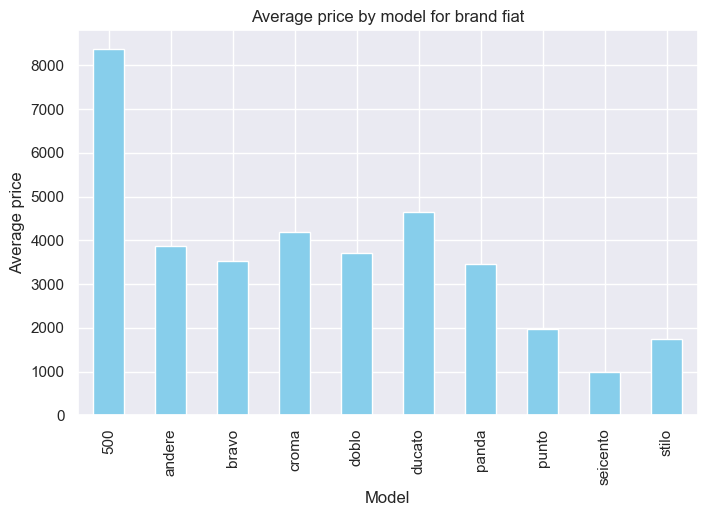

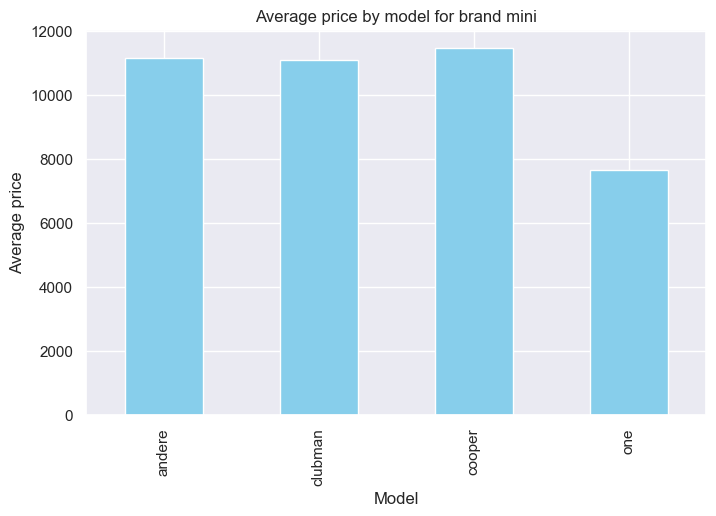

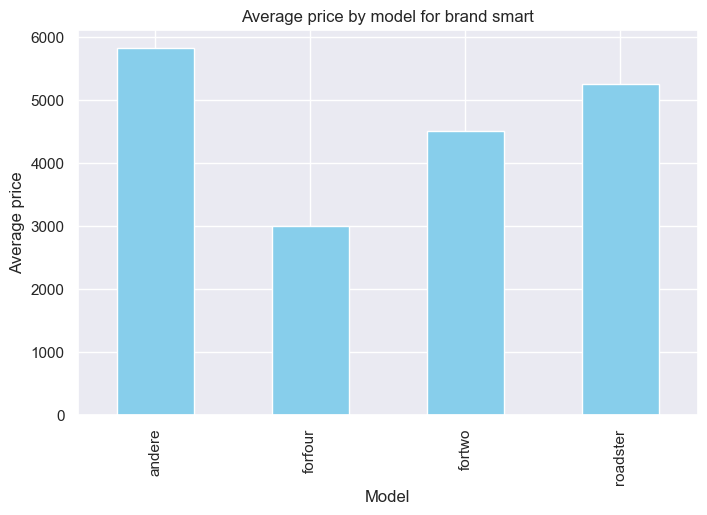

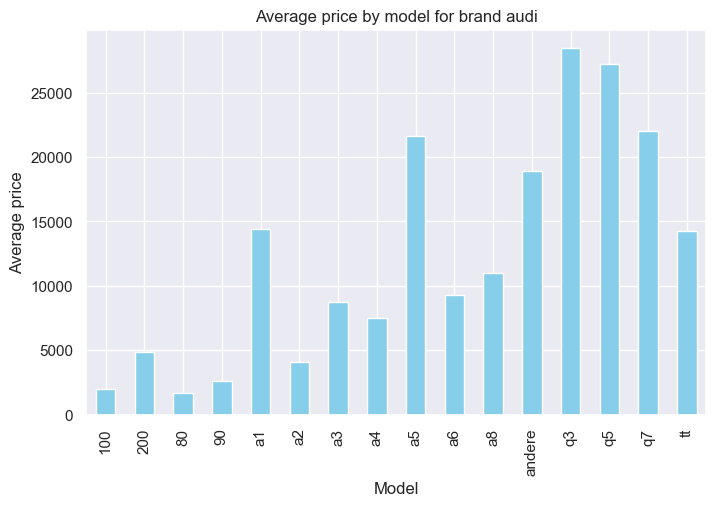

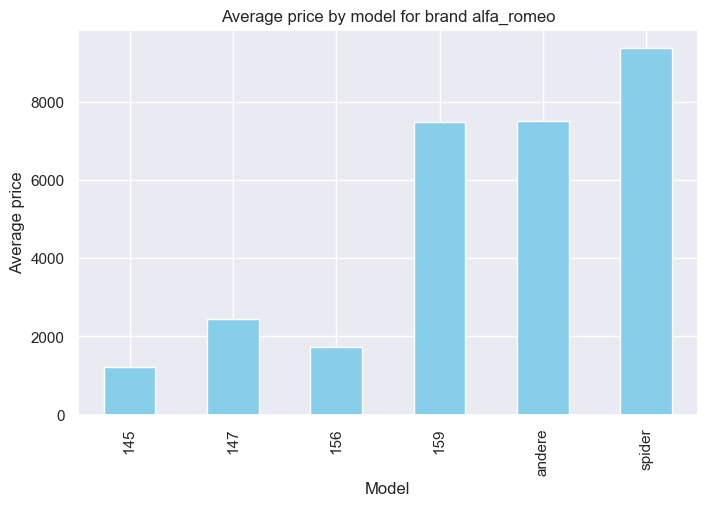

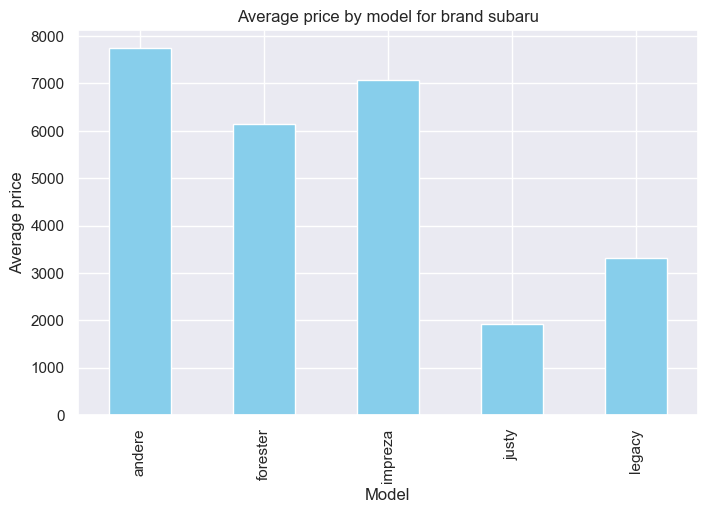

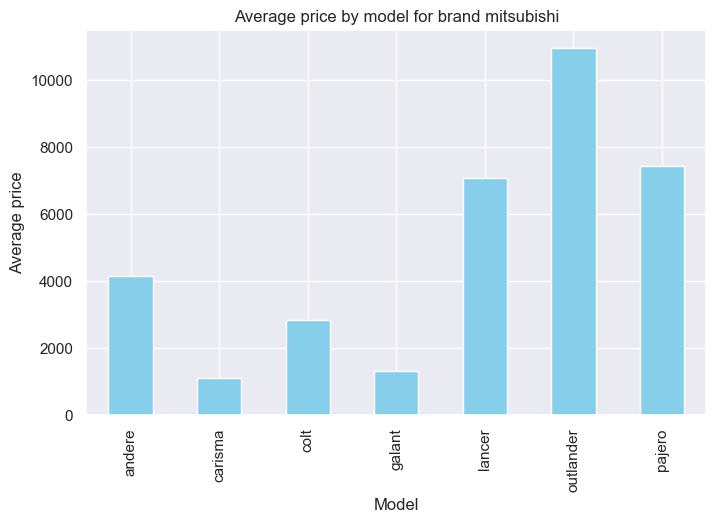

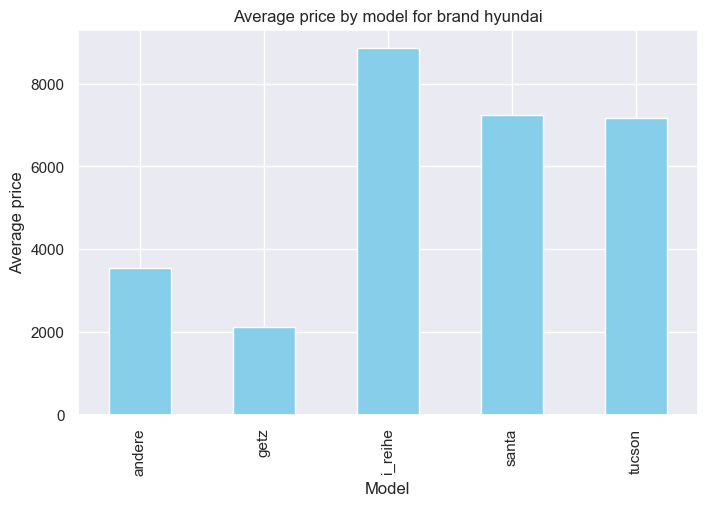

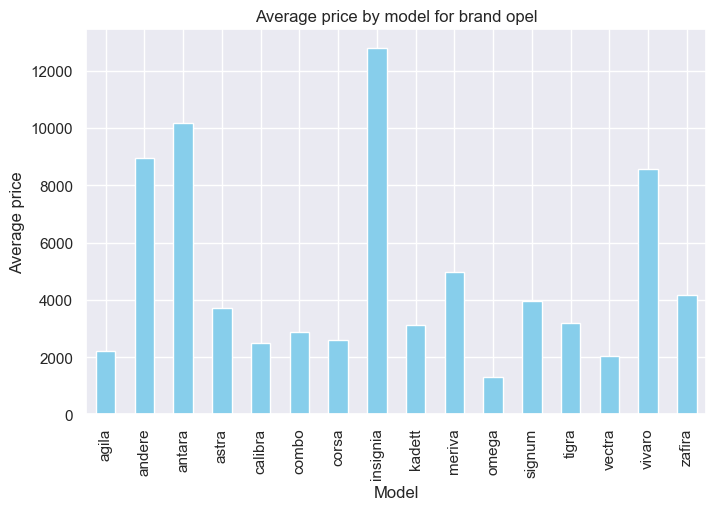

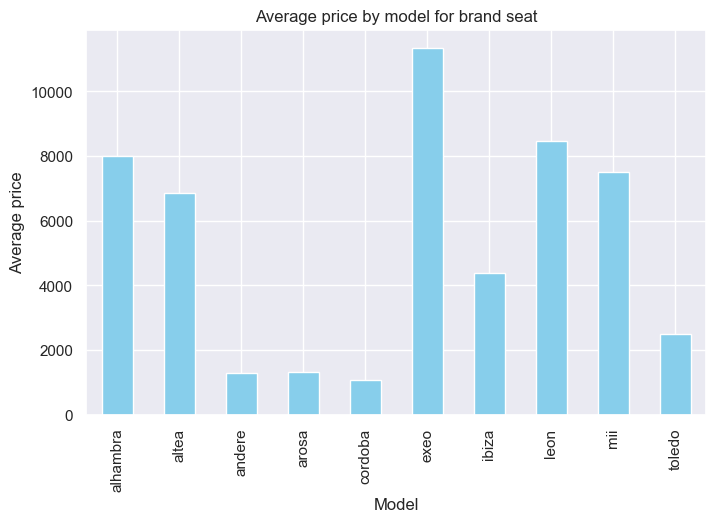

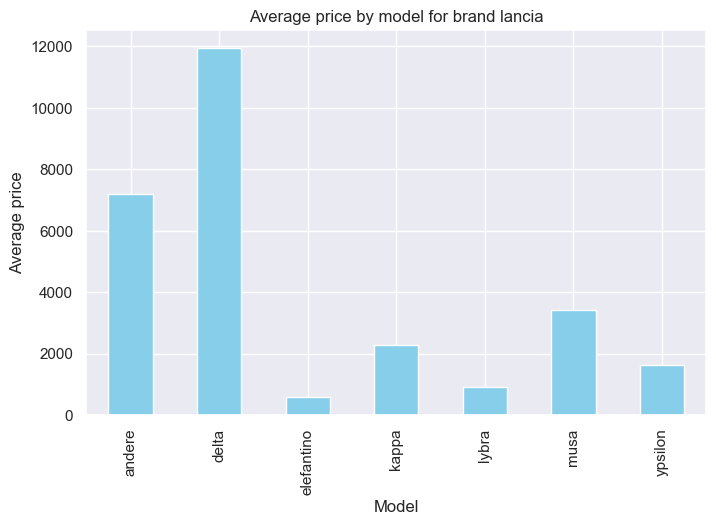

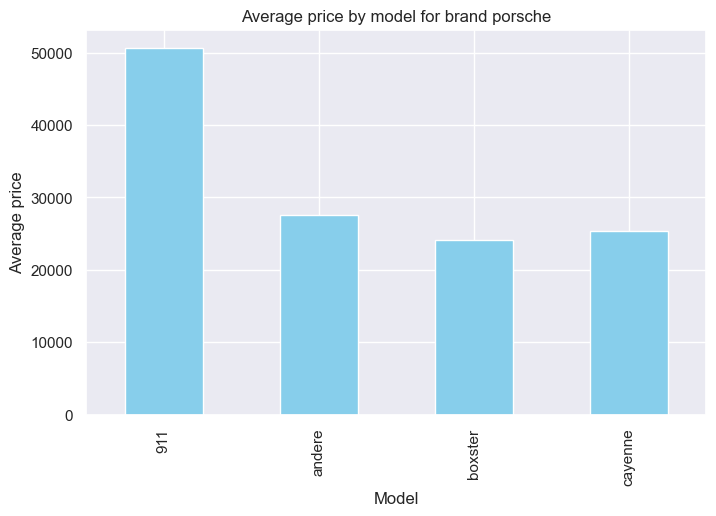

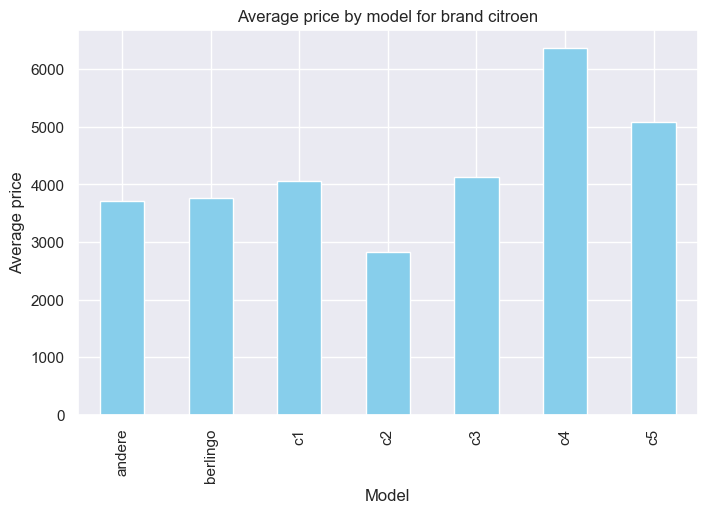

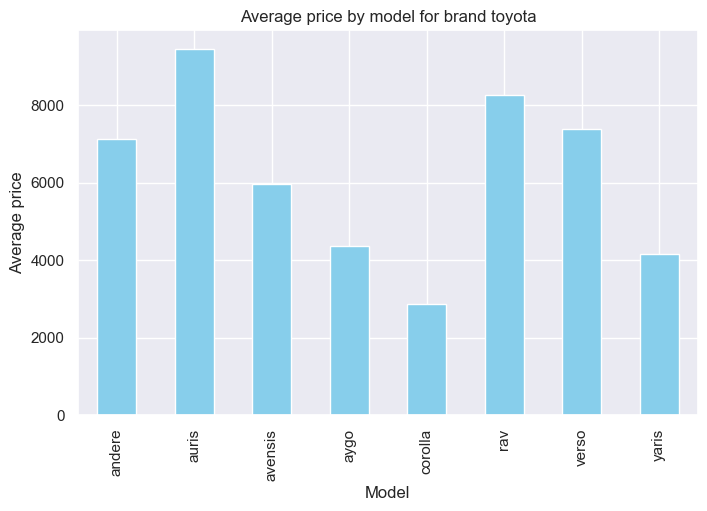

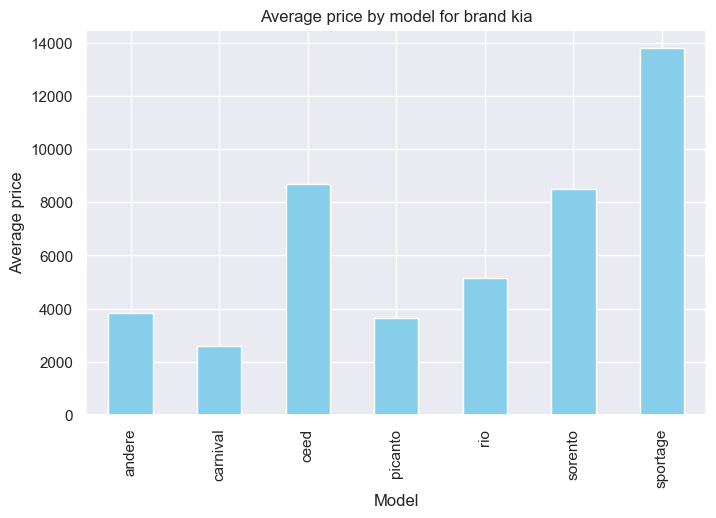

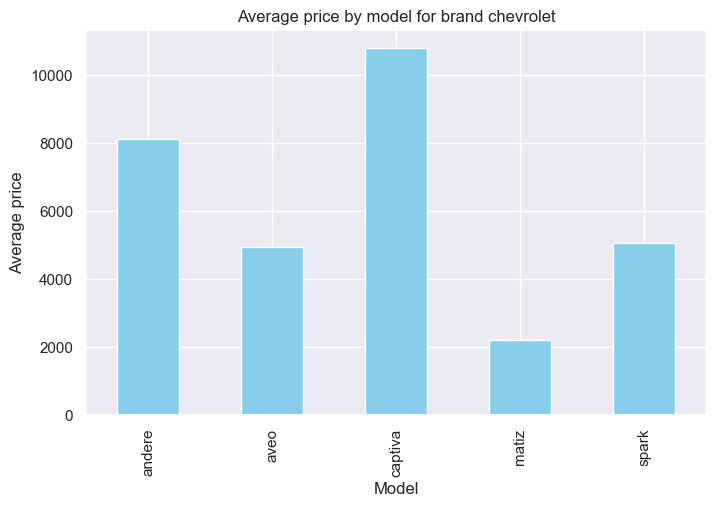

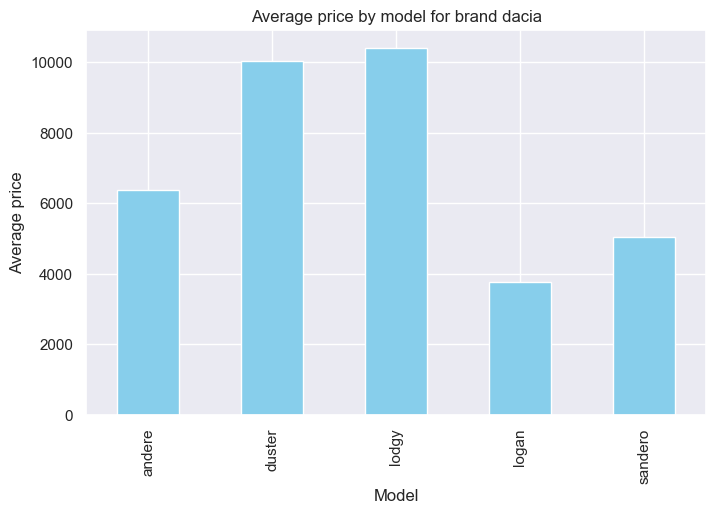

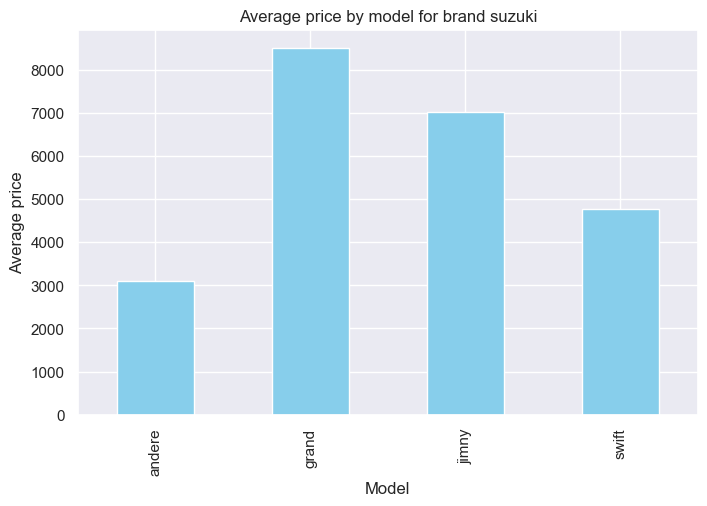

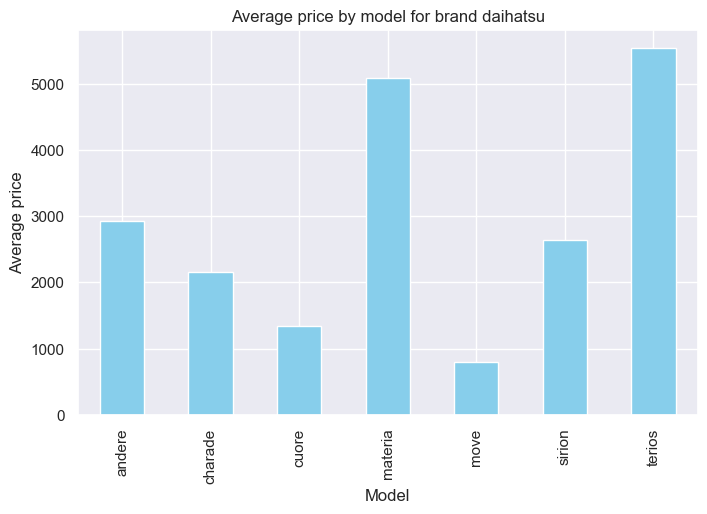

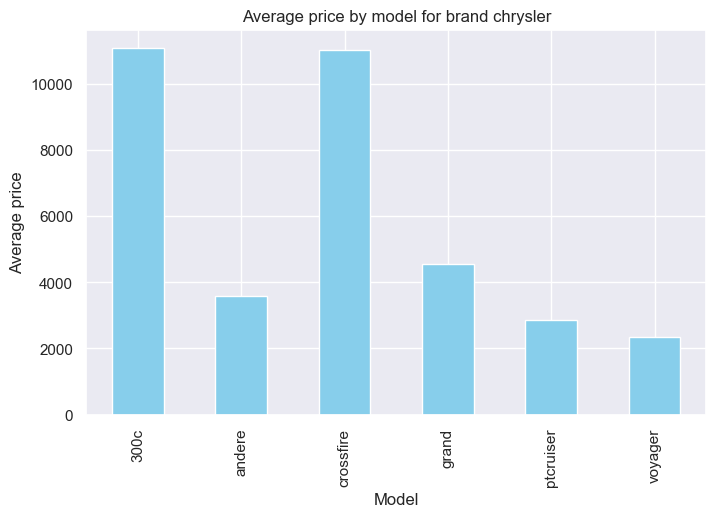

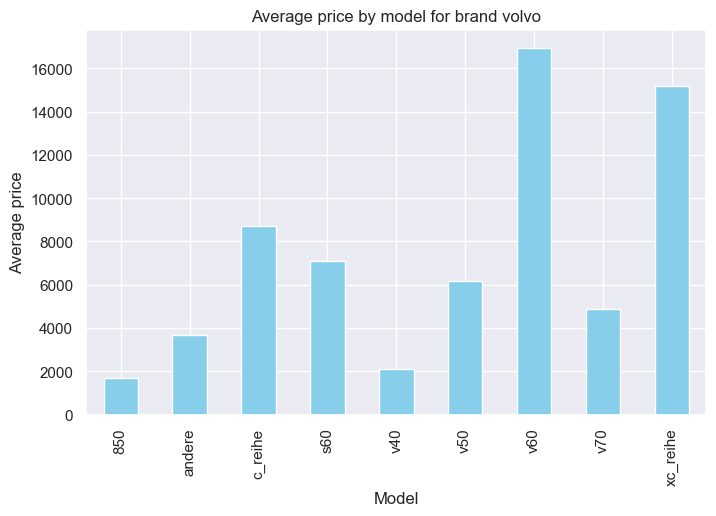

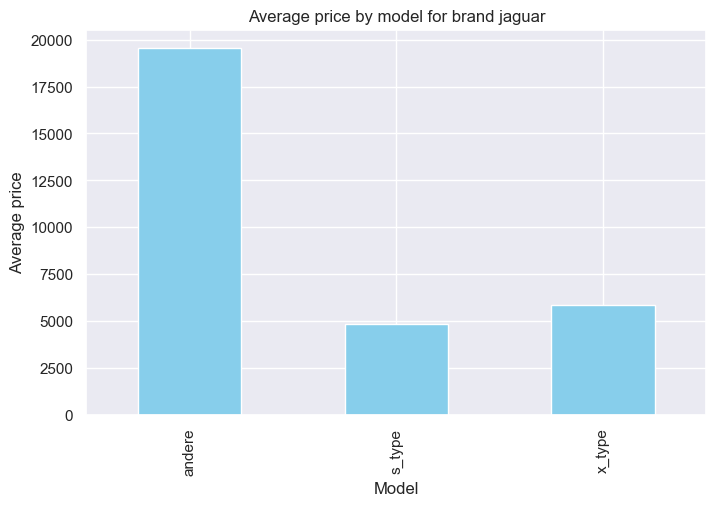

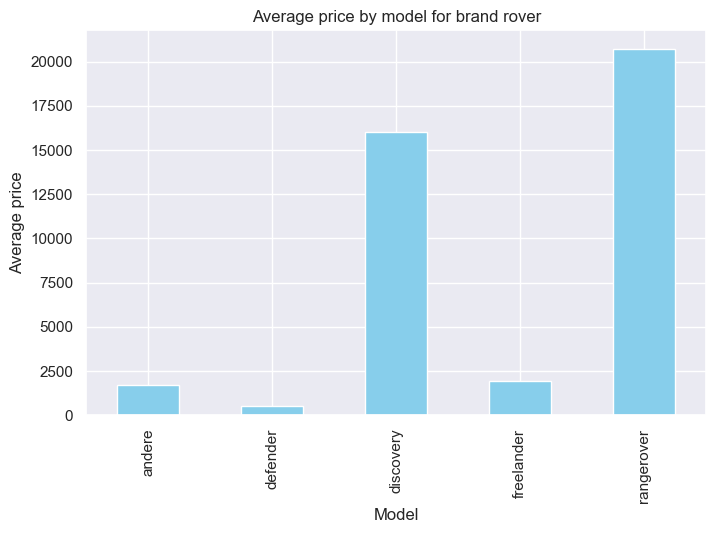

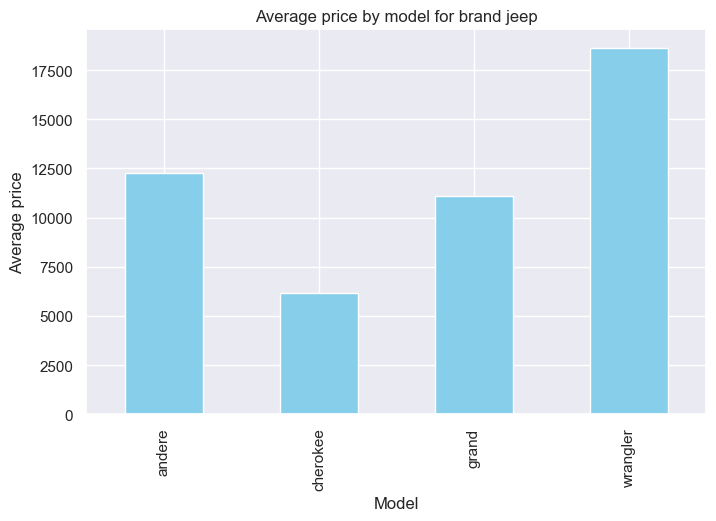

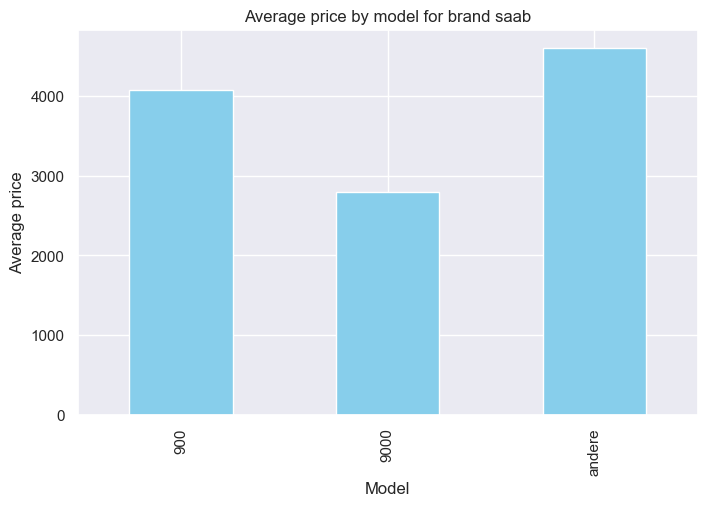

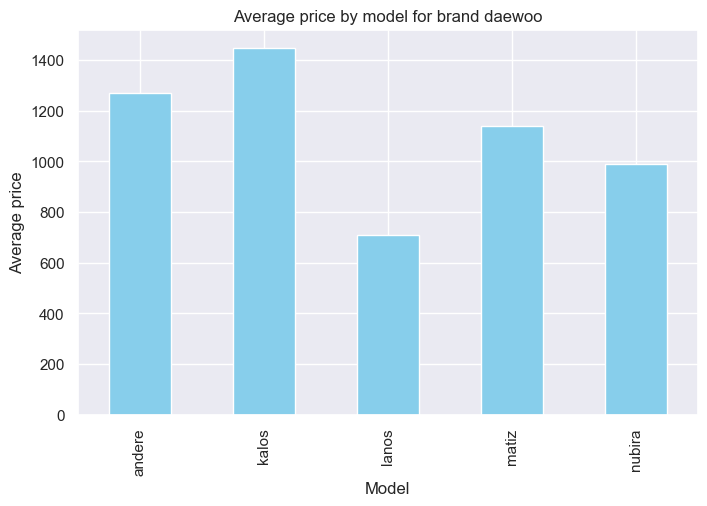

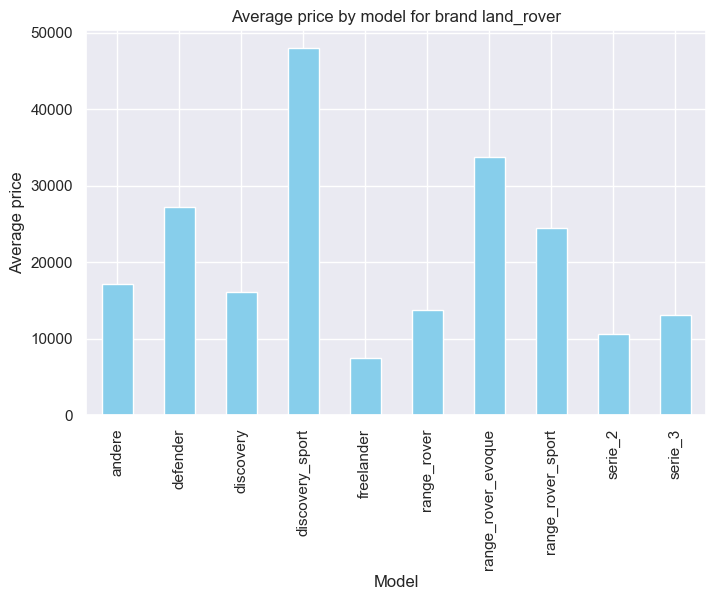

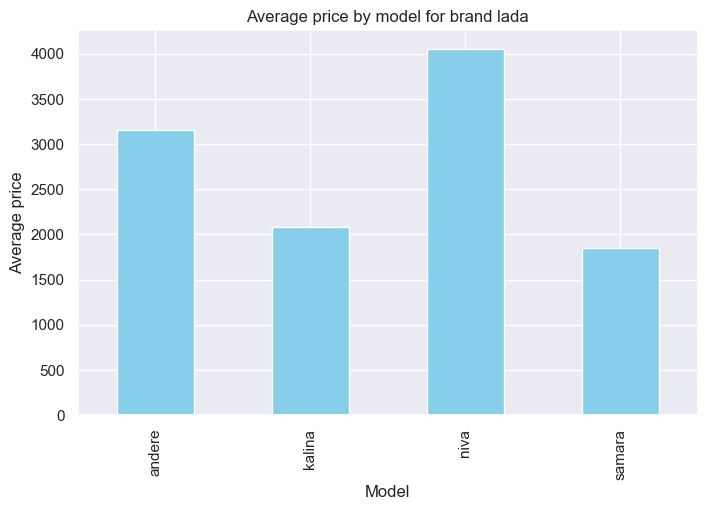

In [17]:
# Группируем данные по 'brand' и 'model' и находим среднее значение 'price' для каждого бренда и модели
brand_model_price = data.groupby(['brand', 'model'])['price'].mean()

# Создаем отдельный график для каждого бренда
brands = data['brand'].unique()
for brand in brands:
    brand_data = brand_model_price.loc[brand]
    plt.figure(figsize=(8, 5))
    brand_data.plot(kind='bar', color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Average price')
    plt.title(f'Average price by model for brand {brand}')
    plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

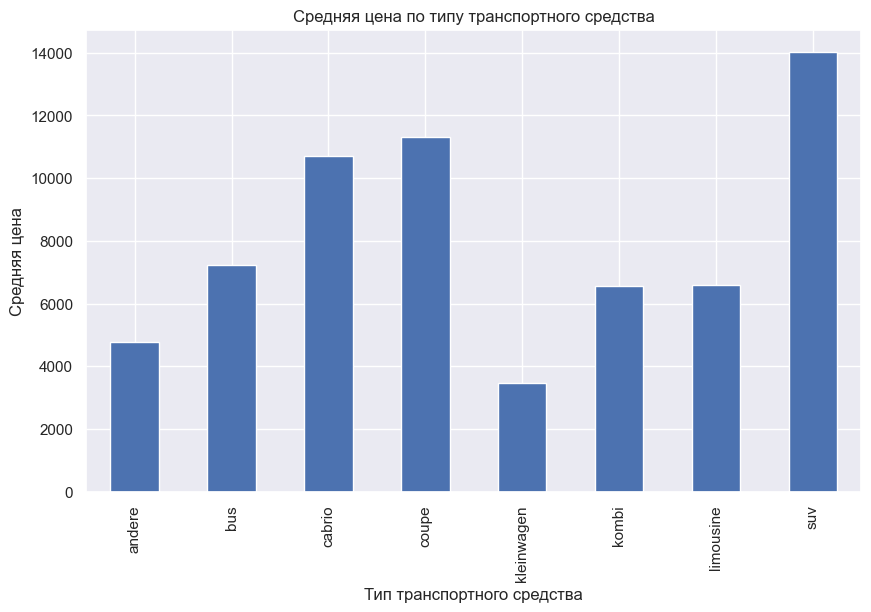

In [18]:
brand_log_price = data.groupby('vehicleType')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу транспортного средства')
plt.show()

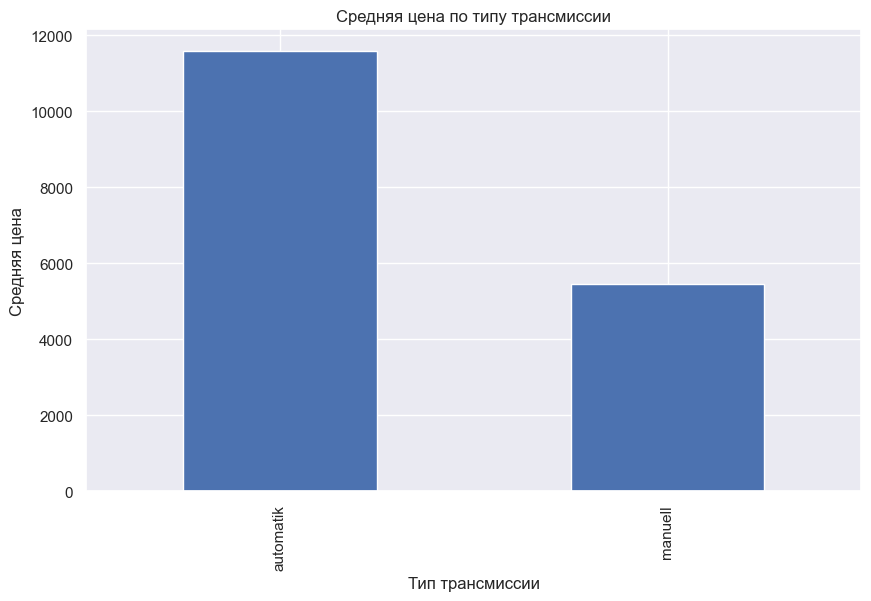

In [19]:
brand_log_price = data.groupby('gearbox')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу трансмиссии')
plt.show()

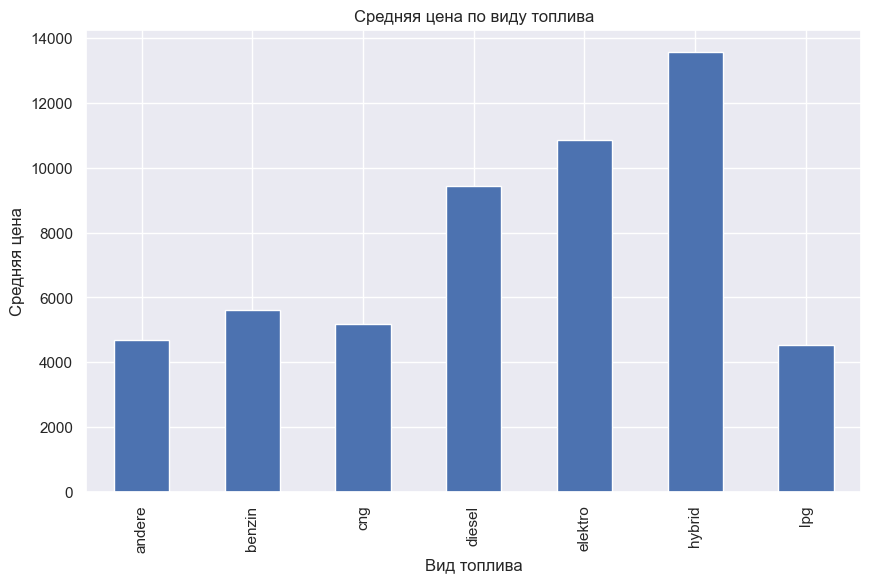

In [20]:
brand_log_price = data.groupby('fuelType')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Вид топлива')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по виду топлива')
plt.show()

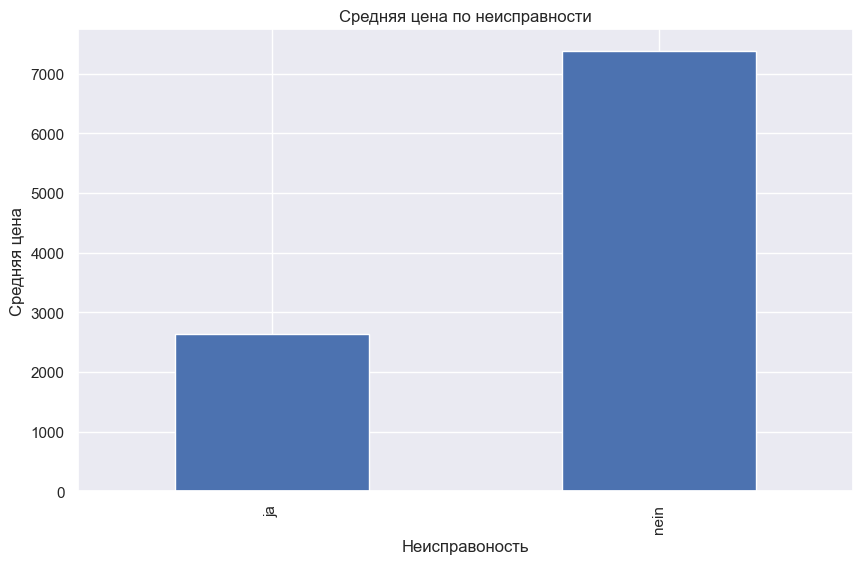

In [21]:
brand_log_price = data.groupby('notRepairedDamage')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Неисправоность')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по неисправности')
plt.show()

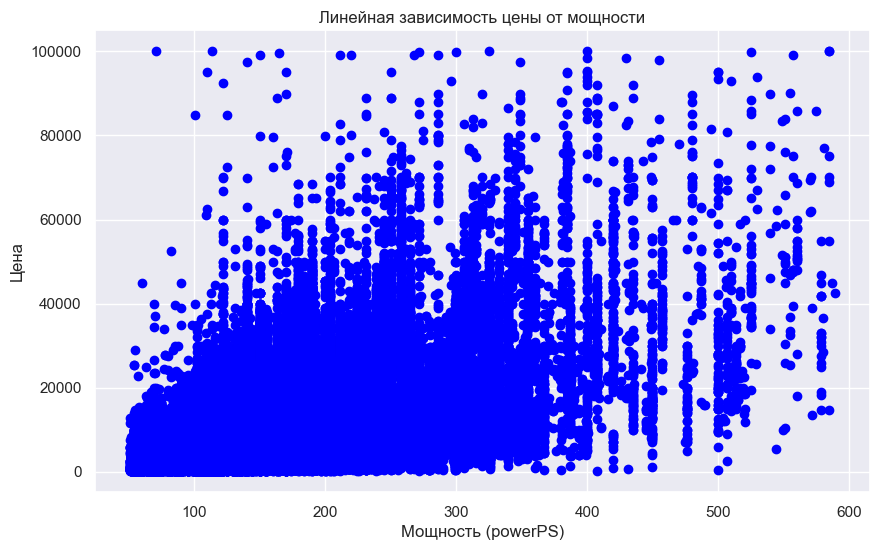

In [22]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['powerPS'], data['price'], color='blue')
plt.xlabel('Мощность (powerPS)')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от мощности')
plt.show()

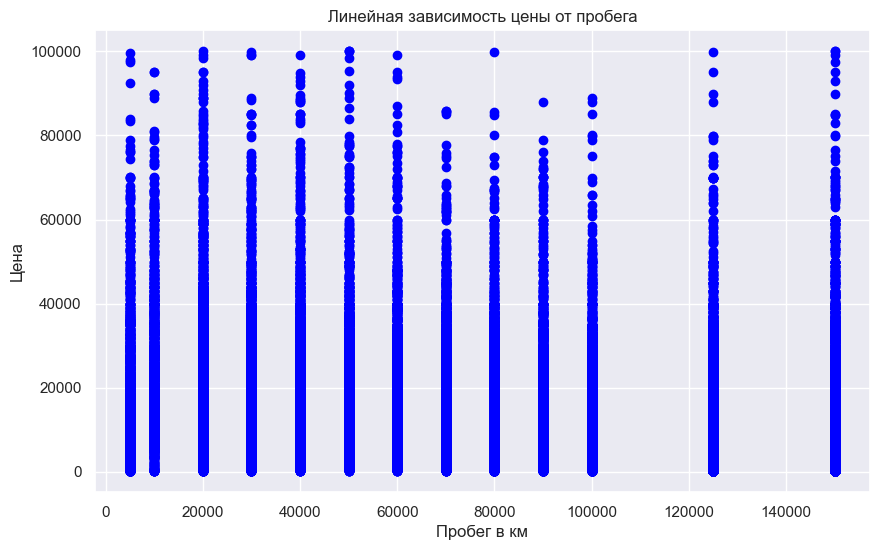

In [23]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['kilometer'], data['price'], color='blue')
plt.xlabel('Пробег в км')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от пробега')
plt.show()

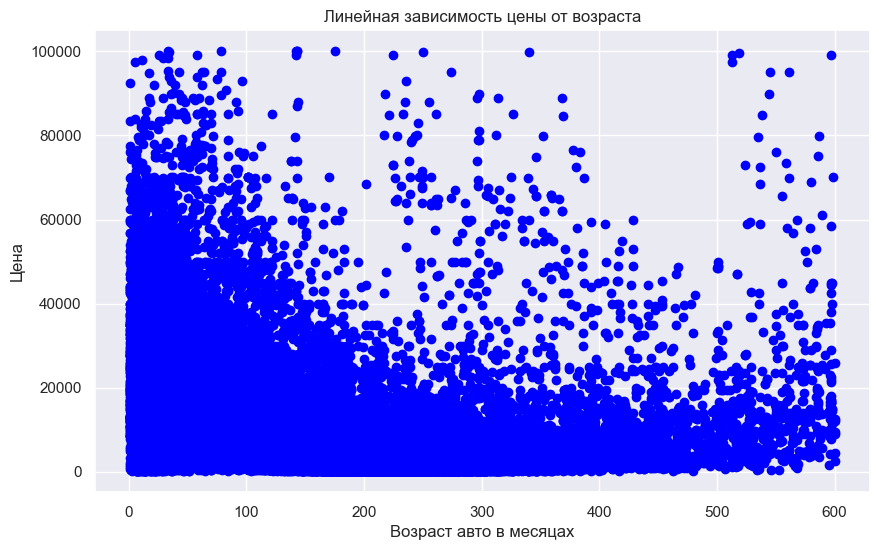

In [24]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['autoAgeMonths'], data['price'], color='blue')
plt.xlabel('Возраст авто в месяцах')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от возраста')
plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [25]:
data['brand_model'] = data['brand'].to_string() + '_' + data['model'].to_string()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Создание объекта StandardScaler
standart_scaler = StandardScaler()

# Применение стандартизации к признаку 'powerPS'
data['powerPS_standardized'] = standart_scaler.fit_transform(data[['powerPS']])

# Создание объекта MinMaxScaler
min_max_scaler = MinMaxScaler()
# Применение нормализации к признаку 'kilometer'
data['kilometer_normalized'] = min_max_scaler.fit_transform(data[['kilometer']])

data['autoAgeMonths_normalized'] = min_max_scaler.fit_transform(data[['autoAgeMonths']])

In [27]:
categorical = ['brand', 'model', 'brand_model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS_standardized', 'kilometer_normalized', 'autoAgeMonths_normalized']
#other = []

In [28]:
#data['bias'] = 1
#other += ['bias']

x = data[categorical + numeric]
y = data['log_price']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
#    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split

# Сначала разделим на обучающую и временную выборки (80% и 20% соответственно)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

# Затем разделим временную выборку на валидационную и тестовую (10% и 10% от исходного датасета)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# В итоге у нас есть:
# X_train, y_train - обучающая выборка (80%)
# X_val, y_val - валидационная выборка (10%)
# X_test, y_test - тестовая выборка (10%)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [31]:
from typing import Dict, List, Tuple
from sklearn.metrics import r2_score

from descents import LossFunction

lambda_values = np.logspace(-4, 1, num=5)

max_iter = 500
tolerance = 1e-4
batch_size = 10
iter_count = 1500


# Преобразование разреженной матрицы в массив NumPy
X_train_array = X_train.toarray()
Y_train_array = y_train.values

# Валидационная выборка
X_val_array = X_val.toarray()
y_val_array = y_val.values

def print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count, mu: float = None, batch_sizes: int = None):
    """
    Выводит в консоль информацию о лучших параметрах модели.

    Этот метод предназначен для вывода значений ключевых метрик и параметров после процесса обучения модели, 
    включая скорость обучения, ошибку на тренировочной и валидационной выборках, а также коэффициент детерминации R^2 
    на тренировочной и валидационной выборках. Параметр mu относится к коэффициенту регуляризации, а batch_sizes — к размеру батча.
    """

    base_message = (
        f'Параметры:\n'
        f'lambda_ = {lr} \n'
        f'Ошибка на тренировочной выборке = {last_train_loss} \n'
        f'Ошибка на валидационной выборке = {val_loss} \n'
        f'R2_train = {r2_train} \n'
        f'R2_val = {r2_val} \n'
        f'Iter_count = {iter_count}\n'
    )

    if mu is not None:
        base_message += f'mu = {mu} \n'

    if batch_sizes is not None:
        base_message += f'Batch_size = {batch_sizes} \n'
    
    print(base_message)


def get_train_result(loss_function: LossFunction = LossFunction.MSE ,lr: float = 0.01, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, mu: float = 0.1,  batch_size: int = None, tolerance: float = 1e-4, 
                     max_iter: int = 500, min_loss: float = 0) -> Tuple[float, float, float, float, List[float]]:
    """
    Обучает модель линейной регрессии, используя заданную конфигурацию градиентного спуска, и возвращает результаты.

    Parameters:
    ----------
    lr : float, optional
        Скорость обучения (learning rate). По умолчанию равно 0.01.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживает 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только для 'stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж, содержащий следующие элементы:
        - r2_train (float): Коэффициент детерминации R^2 на обучающем наборе данных.
        - r2_val (float): Коэффициент детерминации R^2 на валидационном наборе данных.
        - last_train_loss (float): Значение функции потерь на последней итерации обучения.
        - val_loss (float): Значение функции потерь на валидационном наборе данных.
        - loss_history (list[float]): История значений функции потерь в процессе обучения.

    Примечания:
    ----------
    - Предполагается, что `X_train_array`, `Y_train_array`, `X_val_array`, `y_val_array` 
      являются глобально определенными переменными и содержат данные для обучения и валидации модели.
    - Метод `fit` модели `LinearRegression` использует `descent_config` для конфигурации выбранного метода градиентного спуска.
    """
    
    if descent_reg:
        if descent_name == 'stochastic':
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': descent_reg, 
                    'kwargs': {
                        'dimension': X_train.shape[1],                    
                        'batch_size': batch_size,
                        'lambda_' : lr,                    
                        'mu': mu,
                        'isBasis': isBasis
                    }
                }
        else:
            descent_config = {
                        'descent_name': descent_name,
                        'regularized': descent_reg, 
                        'kwargs': {
                            'dimension': X_train.shape[1],                                           
                            'lambda_' : lr,                        
                            'mu': mu,
                            'isBasis': isBasis
                        }
                    }
    else:
        if descent_name == 'stochastic':
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': descent_reg, 
                    'kwargs': {
                        'dimension': X_train.shape[1],                    
                        'batch_size': batch_size,
                        'lambda_' : lr,
                        'isBasis': isBasis,
                        'loss_function': loss_function
                    }
                }
        else:
            descent_config = {
                        'descent_name': descent_name,
                        'regularized': descent_reg, 
                        'kwargs': {
                            'dimension': X_train.shape[1],                                           
                            'lambda_' : lr,
                            'isBasis': isBasis,
                            'loss_function': loss_function
                        }
                    }

    regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
            min_loss=min_loss
        )

    regression.fit(X_train_array, Y_train_array)

    r2_train = r2_score(Y_train_array, regression.predict(X_train_array))
    r2_val = r2_score(y_val, regression.predict(X_val_array))
    last_train_loss = regression.loss_history[-1]
    val_loss = regression.calc_loss(X_val_array, y_val_array)
    loss_history = regression.loss_history    
    
    return r2_train, r2_val, last_train_loss, val_loss, loss_history

def start_lr_seach(lambda_values, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, batch_size: int = None, tolerance: float = 1e-4, 
                   max_iter: int = 300, min_loss: float = 0) -> Tuple[List[Dict[str, List[float]]], List[List[float]]]:
    """
    Выполняет поиск по сетке скоростей обучения (learning rates) для оценки их влияния на обучение модели.

    Parameters:
    ----------
    lambda_values : iterable
        Перечислимый объект (например, список или массив), содержащий значения скорости обучения для тестирования.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживаются 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только если descent_name='stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж из двух элементов:
        - Первый элемент (list of dict): Список словарей, где каждый словарь содержит пару ключей 'lr' (значение скорости обучения) 
          и 'loss_history' (список значений функции потерь для данного значения скорости обучения).
        - Второй элемент (list of list): Список списков, где каждый внутренний список содержит результаты для одного значения 
          скорости обучения, включая само значение скорости обучения, значение функции потерь на последней итерации обучения, 
          значение функции потерь на валидационном наборе данных, коэффициенты детерминации R^2 на обучающем и валидационном 
          наборах данных, и максимальное количество итераций.

    Пример использования:
    --------------------
    lambda_values = [0.001, 0.01, 0.1]
    list_of_dicts, results = start_lr_search(lambda_values, descent_name='adam', max_iter=500)
    
    # Далее, вы можете анализировать 'list_of_dicts' и 'results' для определения оптимального значения скорости обучения.
    """

    result = []
    lrs = []
    loss_histories = []

    for lr in lambda_values:
        r2_train, r2_val, last_train_loss, val_loss, loss_history = get_train_result(lr=lr, descent_name=descent_name, descent_reg=descent_reg, 
                                                                                     isBasis=isBasis,
                                                                                     batch_size=batch_size, tolerance=tolerance, 
                                                                                     max_iter=max_iter, min_loss=min_loss)  

        iter_count = len(loss_history)
        result.append([lr, last_train_loss, val_loss, r2_train, r2_val, iter_count])  
        lrs.append(lr)
        loss_histories.append(loss_history)

        print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count)

    list_of_dictionaries = [{"lr": lr, "loss_history": loss_history} for lr, loss_history in zip(lrs, loss_histories)]

    df_result = pd.DataFrame(result)
    df_result.columns = ['Learning_Rate', 'Error_Trein', 'Error_Val', 'R2_Train', 'R2_Val', 'Iter_count']

    return list_of_dictionaries, df_result

def start_lr_and_mu_seach(lambda_values, mu_valuse, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, 
                          batch_size: int = None, tolerance: float = 1e-4, max_iter: int = 300) -> Tuple[List[Dict[str, List[float]]], List[List[float]]]:
    """
    Выполняет поиск по сетке скоростей обучения (learning rates) для оценки их влияния на обучение модели.

    Parameters:
    ----------
    lambda_values : iterable
        Перечислимый объект (например, список или массив), содержащий значения скорости обучения для тестирования.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживаются 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только если descent_name='stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж из двух элементов:
        - Первый элемент (list of dict): Список словарей, где каждый словарь содержит пару ключей 'lr' (значение скорости обучения) 
          и 'loss_history' (список значений функции потерь для данного значения скорости обучения).
        - Второй элемент (list of list): Список списков, где каждый внутренний список содержит результаты для одного значения 
          скорости обучения, включая само значение скорости обучения, значение функции потерь на последней итерации обучения, 
          значение функции потерь на валидационном наборе данных, коэффициенты детерминации R^2 на обучающем и валидационном 
          наборах данных, и максимальное количество итераций.

    Пример использования:
    --------------------
    lambda_values = [0.001, 0.01, 0.1]
    list_of_dicts, results = start_lr_search(lambda_values, descent_name='adam', max_iter=500)
    
    # Далее, вы можете анализировать 'list_of_dicts' и 'results' для определения оптимального значения скорости обучения.
    """

    result = []
    lrs = []
    mus = []
    loss_histories = []

    for lr in lambda_values:
        for mu in mu_valuse:

            r2_train, r2_val, last_train_loss, val_loss, loss_history = get_train_result(lr=lr, descent_name=descent_name, descent_reg=descent_reg, isBasis=isBasis,
                                                                                        mu=mu, batch_size=batch_size, tolerance=tolerance, max_iter=max_iter)  

            result.append([lr, mu, last_train_loss, val_loss, r2_train, r2_val, max_iter])  
            lrs.append(lr)
            loss_histories.append(loss_history)
            mus.append(mu)
            list_of_dictionaries = [{"lr": lr, "mu": mu, "loss_history": loss_history} for lr, mu, loss_history in zip(lrs, mus, loss_histories)]
            iter_count = len(loss_history)
            
            print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count)

            df_result = pd.DataFrame(result)
            df_result.columns = ['Learning_Rate', 'Mu', 'Error_Trein', 'Error_Val', 'R2_Train', 'R2_Val', 'Iter_count']

    return list_of_dictionaries, df_result 

### Анализ сходимости Full градиентного спуска

В ходе продолжительных испытаний на некоторых параметрах lr сходимость не достигается за разумное время. По этому ограничимся 500 эпохами, и значением в 0.35 для параметра ошибки модели. Если за 500 итераций значение выше порогового, то будем сяитать что сходимость не достигается за разумное время и эти параметры не могут быть оптемальными. Если ошибка меньше 0.35 то считаем что сходимость достигнута.

16.56379951703957
16.541124342803904
16.51848565993225
16.49588340674643
16.47331752167443
16.450787943250212
16.428294610113507
16.405837461009654
16.383416434789414
16.36103147040877
16.33868250692878
16.31636948351536
16.294092339439118
16.27185101407517
16.249645446902978
16.22747557750611
16.20534134557214
16.183242690892417
16.16117955336189
16.139151872978942
16.11715958984519
16.095202644165344
16.07328097624699
16.051394526500427
16.029543235438492
16.007727043676383
15.98594589193146
15.964199721023112
15.942488471872526
15.920812085502561
15.899170503037546
15.877563665703095
15.855991514825952
15.834453991833813
15.81295103825514
15.791482595718998
15.770048605954864
15.748649010792482
15.727283752161654
15.705952772092106
15.684656012713269
15.663393416254143
15.64216492504312
15.620970481507783
15.59981002817479
15.578683507669624
15.557590862716506
15.536532036138155
15.515506970855657
15.49451560988829
15.47355789635334
15.452633773465935
15.431743184538885
15.410886072

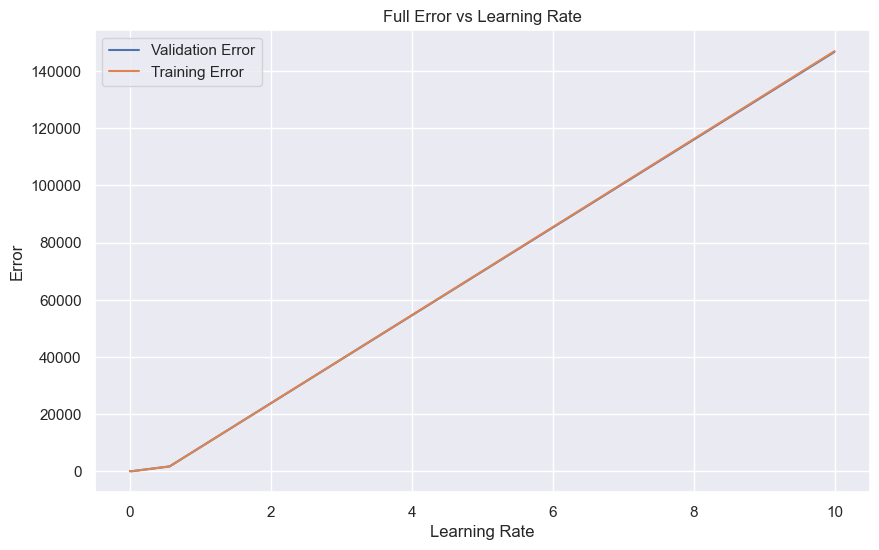

In [32]:
#
full_lr_loss_history, full_df = start_lr_seach(lambda_values=lambda_values, descent_name='full', min_loss=0.35)

# Строим график зависимости lr от error

def plot_err_vs_lr(df: pd.DataFrame, descent_name: str = 'full'):

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Learning_Rate', y='Error_Val', data=df, label='Validation Error')
    sns.lineplot(x='Learning_Rate', y='Error_Trein', data=df, label='Training Error')
    plt.xlabel('Learning Rate')
    plt.ylabel('Error')
    title = descent_name + ' Error vs Learning Rate'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_err_vs_lr(full_df, descent_name='Full')

In [33]:
pd.set_option('display.float_format', lambda d: '%.5f' % d)
full_df

Learning_Rate  Error_Trein    Error_Val      R2_Train        R2_Val  \
0        0.00010     11.18312     11.14725      -8.17383      -7.97315   
1        0.00178      0.73913      0.74532       0.39367       0.40004   
2        0.03162      0.35077      0.35163       0.71225       0.71695   
3        0.56234   1665.33799   1663.06305   -1365.12337   -1337.70752   
4       10.00000 147018.66459 146775.00106 -120602.52588 -118147.73622   

   Iter_count  
0         300  
1         300  
2         300  
3           3  
4           2

In [34]:
# Создаем отдельный график для каждого значения lr
def plot_loss_history(loss_history_by_descent, descent_name: str = 'adam'):

    for dictionary in loss_history_by_descent:
        lr = dictionary["lr"]
        loss_history = dictionary["loss_history"]
        
        # Создаем новый график
        plt.figure(figsize=(8, 4))
        plt.plot(loss_history, marker='o', linestyle='-')
        
        # Добавляем заголовок, включающий значение lr
        plt.title(f'{descent_name} loss history for Learning Rate : {lr}')
        
        # Называем оси
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        # Отображаем график
        plt.show()

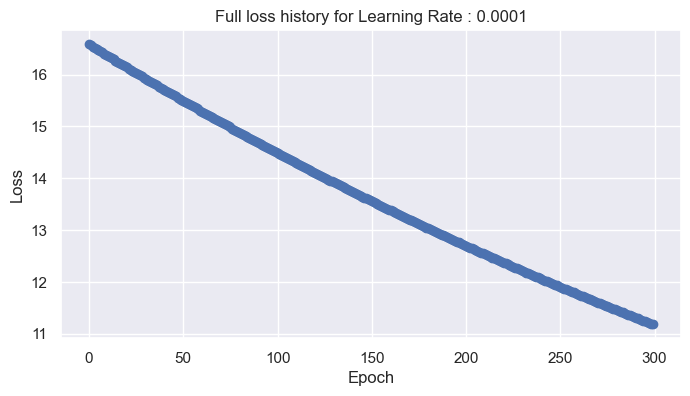

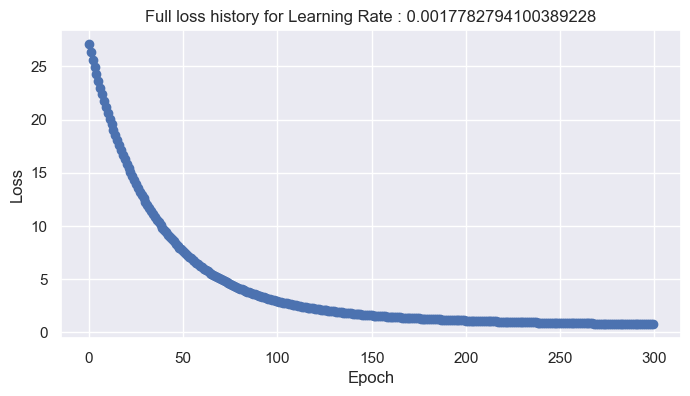

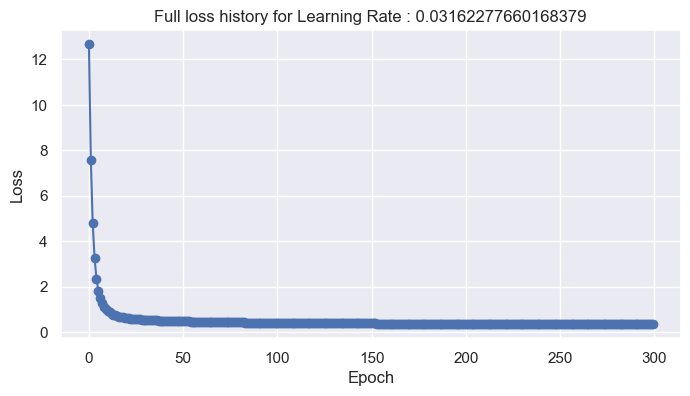

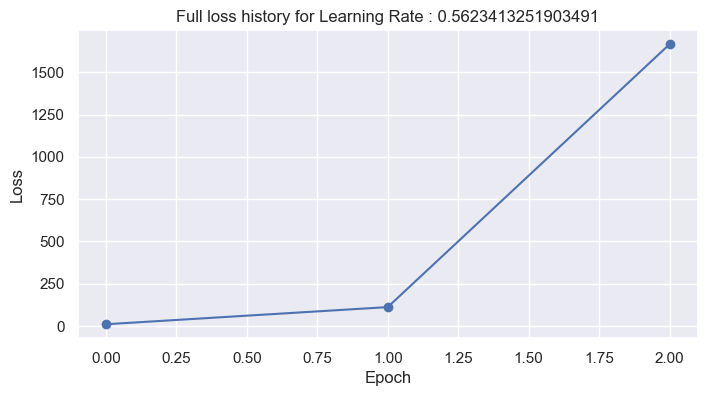

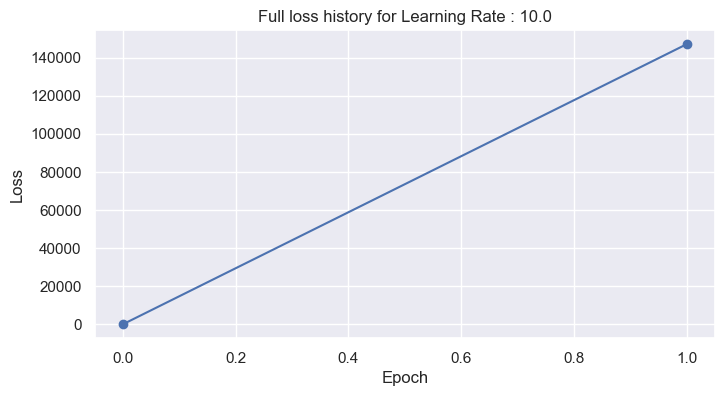

In [35]:
plot_loss_history(loss_history_by_descent=full_lr_loss_history, descent_name='Full')

Из графиков видно, что оптемальное значение lr находится где то в районе 0.06. Попробуем подобрать его в ручную, как и количество необходимых итераций для более глубокой сходимости.

In [36]:
full_lr = 0.03162
full_r2_train, full_r2_val, full_last_train_loss, full_val_loss, full_loss_history = get_train_result(lr=full_lr, descent_name='full', max_iter=iter_count, min_loss=0.26)

10.530148648487636
6.1375885996464845
3.7792638543373003
2.4984560178975888
1.7907889230268645
1.3899277271696957
1.154884338618933
1.0107398702615116
0.9174525318555761
0.8534344340125923
0.8068965408181668
0.7712809913926204
0.7428452769418994
0.7193802720361288
0.6995265104010022
0.6824067519186916
0.6674262956217527
0.6541626806476422
0.642303361530975
0.6316094055077084
0.621893523266822
0.6130061674370931
0.6048263062122659
0.5972550081803695
0.5902107929563475
0.5836261446843973
0.5774448279937738
0.5716197815563565
0.5661114422338387
0.560886399073657
0.5559163050932595
0.5511769934149204
0.5466477569889558
0.542310760155694
0.5381505569465095
0.5341536960766852
0.5303083965062457
0.5266042805392674
0.5230321538991394
0.5195838241984587
0.5162519508211573
0.5130299205290871
0.5099117441558774
0.5068919706046734
0.5039656150609944
0.5011280988974867
0.4983751992080766
0.4957030062845357
0.49310788765466246
0.49058645755104696
0.48813555088321275
0.48575220095231486
0.48343362028

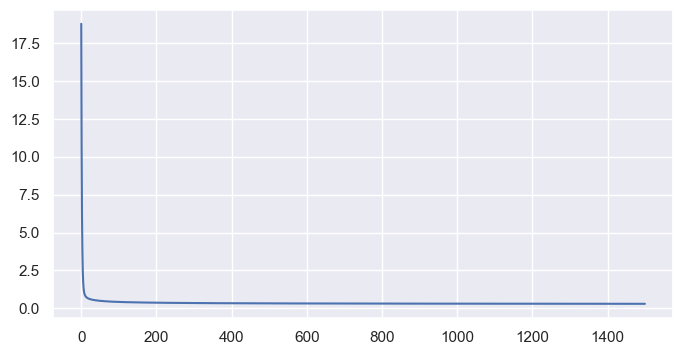

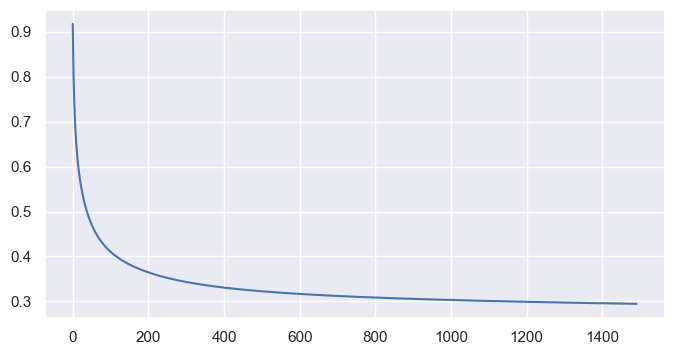

In [37]:
def plot_optimal_loss_history(loss_history):
    # Выводим историю ошибок на график
    plt.figure(figsize=(8, 4))
    plt.plot(loss_history)

    plt.figure(figsize=(8, 4))    
    filtered_regression_history= [val for val in loss_history if val < 1]
    # Создаем график для отфильтрованных значений
    plt.plot(filtered_regression_history)

plot_optimal_loss_history(full_loss_history)

### Анализ StochasticDescent

In [38]:
stochastic_lr_loss_history, stochastic_df = start_lr_seach(lambda_values=lambda_values, descent_name='stochastic', batch_size=batch_size, min_loss=0.35)

14.579067534641448
14.562253791207905
14.539165679497446
14.51418645217772
14.495898120875033
14.477536996376955
14.44932107213442
14.433634324998568
14.407474136095738
14.380016193741538
14.36007681171939
14.342040712486414
14.32078387532339
14.298590473672157
14.272586391750483
14.239133353895864
14.215880913061982
14.201445690220833
14.178082662878065
14.144388253967414
14.115592107428109
14.092254026130517
14.063848704142224
14.042045409354893
14.023507579646267
14.001047922878415
13.97099174122046
13.95168929115668
13.932240923290008
13.90978596874825
13.886598319695809
13.872452153206737
13.851939178496334
13.829880053094083
13.806966858376219
13.791856118995245
13.76702357713754
13.747839879392357
13.727441606931022
13.702989954764849
13.679723073191639
13.660228675468135
13.639974660796275
13.625762459906204
13.608024205392185
13.590446529738271
13.569446461590218
13.551635714099504
13.528810625251973
13.512725383849423
13.496922971726843
13.478326496761136
13.464380921389802
1

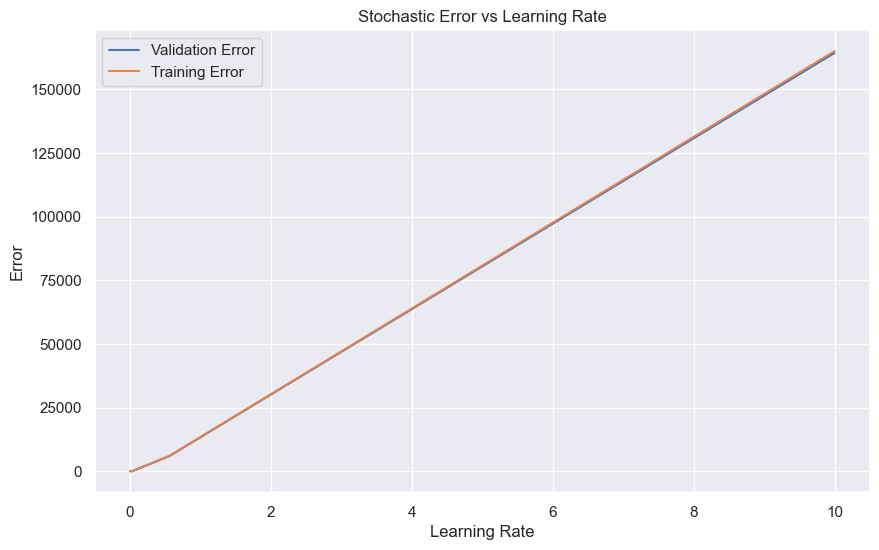

In [39]:
plot_err_vs_lr(stochastic_df, descent_name='Stochastic')

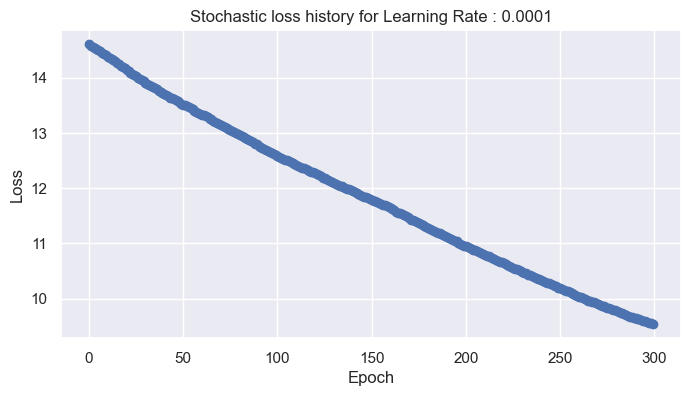

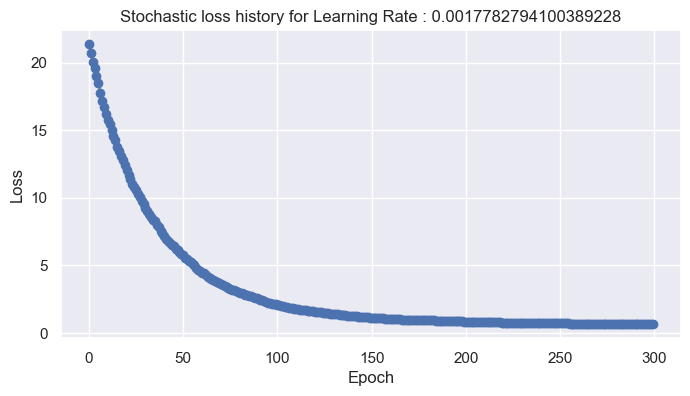

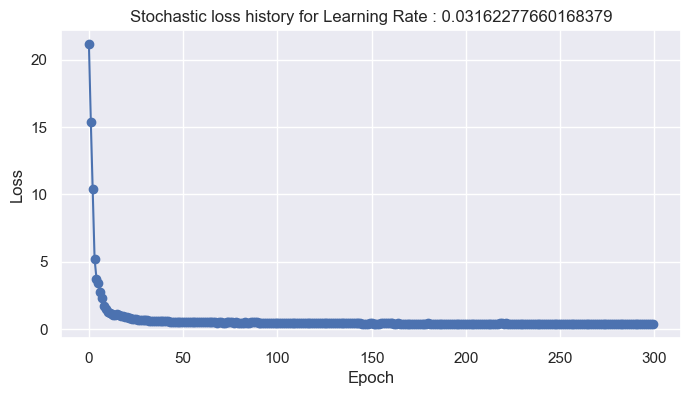

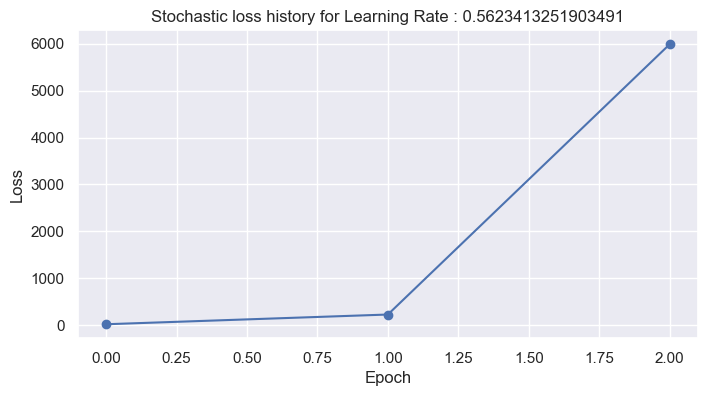

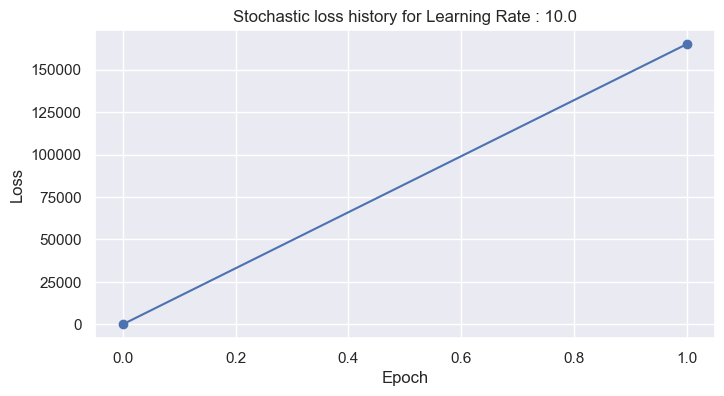

In [40]:
plot_loss_history(loss_history_by_descent=stochastic_lr_loss_history, descent_name='Stochastic')

In [41]:
stochastic_df

Learning_Rate  Error_Trein    Error_Val      R2_Train        R2_Val  \
0        0.00010      9.53847      9.51333      -6.82467      -6.65789   
1        0.00178      0.63589      0.64369       0.47836       0.48185   
2        0.03162      0.35649      0.36185       0.70756       0.70872   
3        0.56234   5988.35334   5986.07311   -4911.41387   -4817.57924   
4       10.00000 165063.03078 164380.48628 -135404.82457 -132319.53533   

   Iter_count  
0         300  
1         300  
2         300  
3           3  
4           2

In [42]:
stochastic_lr = 0.03162
stochastic_r2_train, stochastic_r2_val, stochastic_last_train_loss, stochastic_val_loss, stochastic_loss_history = get_train_result(lr=stochastic_lr, descent_name='stochastic', max_iter=iter_count, batch_size=batch_size, min_loss=0.26)

18.72821997469328
12.41954235818209
8.293530892314612
5.719734986311691
4.844728750348193
4.250816930116239
4.068590424564774
2.990151830504684
2.2871276106976524
2.022407539325913
1.8478859374519339
1.5445180703470602
1.40543792016393
1.31608101331748
1.2811776494297409
1.1063751834949713
0.9866650848195332
0.9120492948839541
0.8677838480442303
0.8204058318176751
0.7678464998931541
0.7306326972575662
0.686964950220052
0.6624768118071597
0.6448486904130151
0.6342268806151153
0.6144252953104721
0.600541872195229
0.6026879001337941
0.596333960519584
0.6029924974244761
0.5899325424054661
0.5789426908970082
0.5736814901564766
0.5762395318227861
0.5670002266008448
0.5635532845456293
0.5640946772666785
0.576104817901546
0.5637645790827219
0.5612919444781918
0.5514445426613088
0.5521930819408757
0.5480267270494028
0.5513680358830875
0.5446591652876468
0.5385707180534987
0.5437220693394551
0.539663217652538
0.5396582918903574
0.5377052149276891
0.5334959264971827
0.529916446562469
0.5358910665

In [43]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, len(stochastic_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3231455972310917 
Ошибка на валидационной выборке = 0.32371512192141 
R2_train = 0.7349146211477344 
R2_val = 0.7394206624186039 
Iter_count = 1500



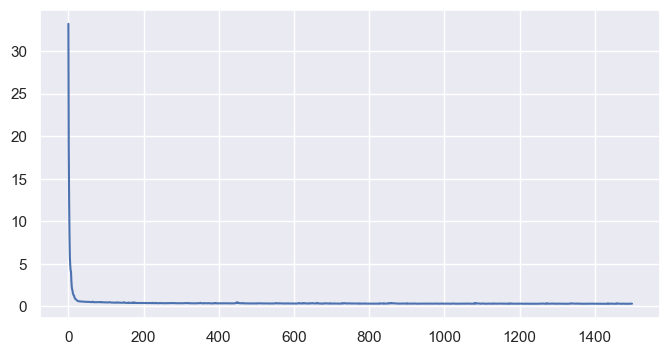

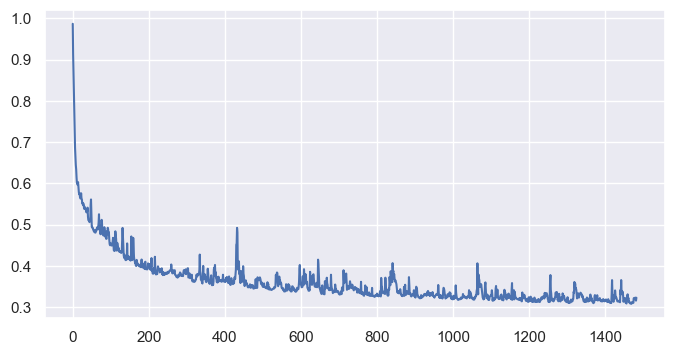

In [44]:
plot_optimal_loss_history(stochastic_loss_history)

### Momentum

In [45]:
momentum_lr_loss_history, momentum_df = start_lr_seach(lambda_values=lambda_values, descent_name='momentum')

23.671267491884375
23.60044104757473
23.49969281480191
23.372309442009783
23.221311260656694
23.049465902118452
22.85930286416903
22.65312852801478
22.43304124728572
22.200946226464012
21.958569982539387
21.70747424397322
21.44906918839262
21.184625957326897
20.915288414782708
20.642084138196097
20.36593464665209
20.087664883326262
19.808011977769496
19.52763331964871
19.247113979456373
18.966973513978658
18.687672195345066
18.409616702571512
18.13316531389627
17.85863263708456
17.5862939133939
17.316388929166944
17.049125567144067
16.78468302763477
16.523214747710192
16.264851044618517
16.00970150771107
15.757857161321375
15.509392419275787
15.264366850043976
15.022826769963602
14.784806680500939
14.550330564135495
14.319413052182007
14.092060476683384
13.86827181741992
13.64803955407861
13.43135043270703
13.218186154733658
13.00852399606622
12.802337363075626
12.599596291631622
12.400267894771632
12.204316764052496
12.011705329151567
11.822394179844611
11.636342354089908
11.453507595

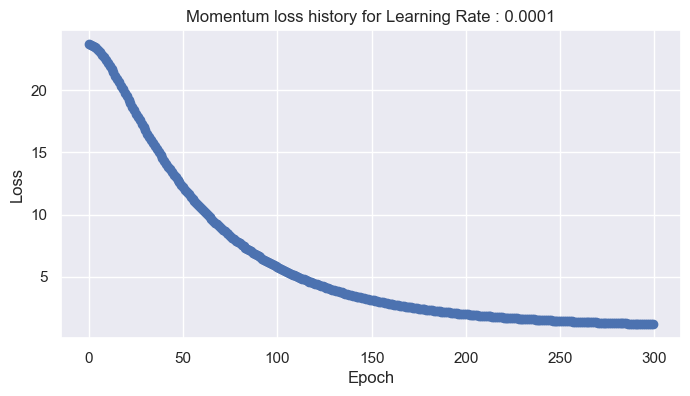

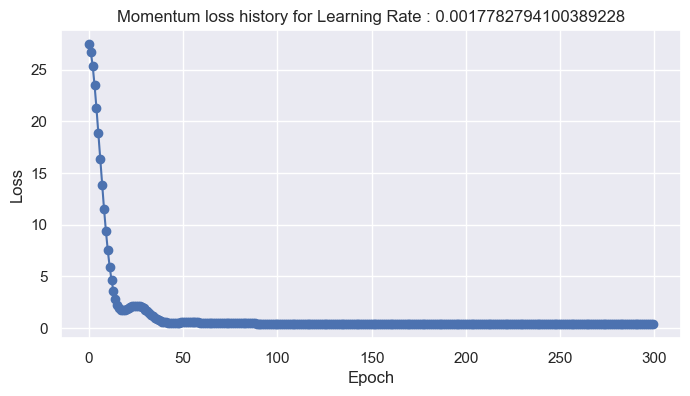

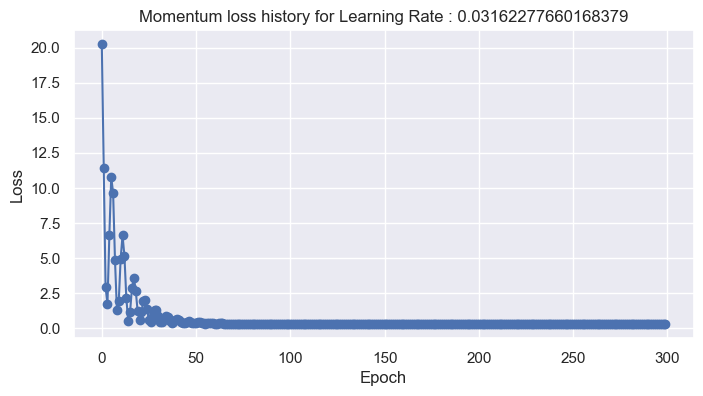

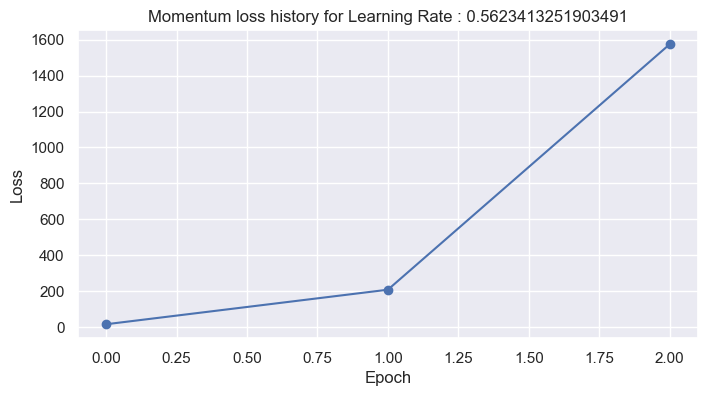

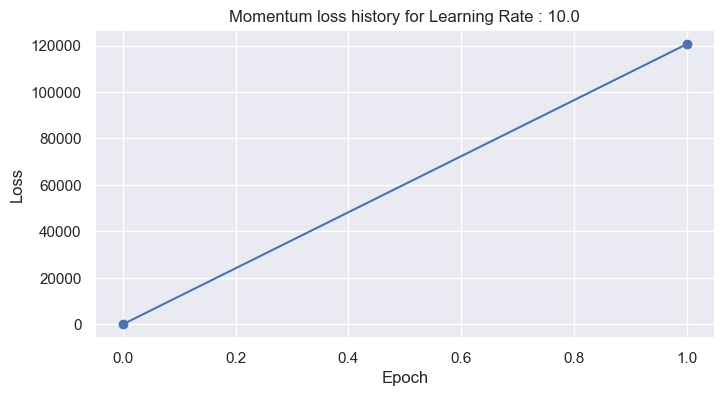

In [46]:
plot_loss_history(momentum_lr_loss_history, 'Momentum')

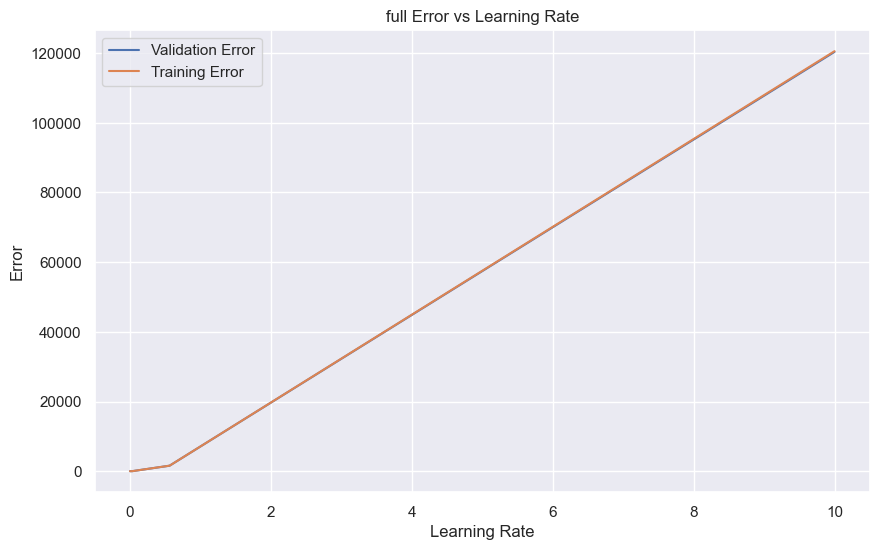

In [47]:
plot_err_vs_lr(momentum_df)

In [48]:
momentum_df

Learning_Rate  Error_Trein    Error_Val     R2_Train       R2_Val  \
0        0.00010      1.17328      1.17315      0.03753      0.05566   
1        0.00178      0.35843      0.36101      0.70597      0.70940   
2        0.03162      0.28558      0.28730      0.76573      0.76873   
3        0.56234   1574.54752   1572.69784  -1290.64541  -1264.96669   
4       10.00000 120569.99514 120363.06557 -98905.94199 -96887.05302   

   Iter_count  
0         300  
1         300  
2         300  
3           3  
4           2

In [49]:
momentum_lr = 0.03162
momentum_r2_train, momentum_r2_val, momentum_last_train_loss, momentum_val_loss, momentum_loss_history = get_train_result(lr=momentum_lr, descent_name='momentum', max_iter=iter_count, min_loss=0.26)

8.355073684120876
2.4369577317218205
1.5515720313497883
4.812215119538154
7.602783160118653
6.794720380036532
3.487905443784962
1.0993021169316282
1.5554855686503615
3.6601669835413015
4.8196221846896705
3.8194222355117367
1.7559466704364193
0.5597463916234751
0.9884741685259626
2.127833806768046
2.5951956816795976
1.9580899798245424
0.9572556895158237
0.551174899026243
0.9364861216888051
1.4998855314100363
1.5699153497895004
1.0850238693417604
0.543089686590769
0.41565950505400856
0.6957070928786567
0.9926070010876502
0.9797754095587531
0.6956010800026587
0.43486059111483527
0.41392762192723664
0.5768400458659313
0.7026454980339608
0.6519536786542804
0.4868025557440545
0.3716970434589047
0.3936474064719139
0.4915022482896119
0.5426909980654487
0.4935446527214643
0.39850569170777467
0.3472828423242693
0.3715719417679673
0.42544938523582043
0.4444007998695314
0.4109251697415091
0.36205572569237565
0.34272539014138165
0.36058017191767217
0.3857691297682345
0.38727772771863156
0.363504476

In [50]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, momentum_r2_train, momentum_r2_val, len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2661487441807746 
Ошибка на валидационной выборке = 0.2670388564432016 
R2_train = 0.7816707351523614 
R2_val = 0.7850430714900107 
Iter_count = 1500



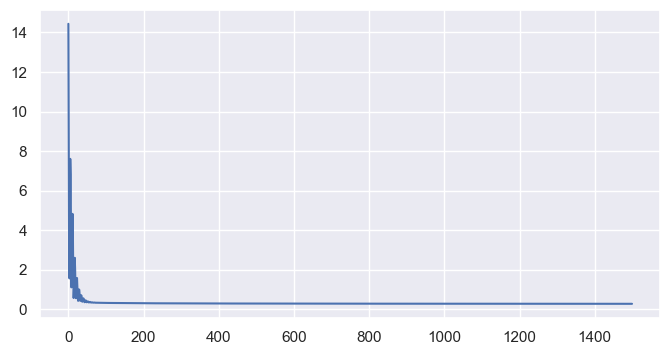

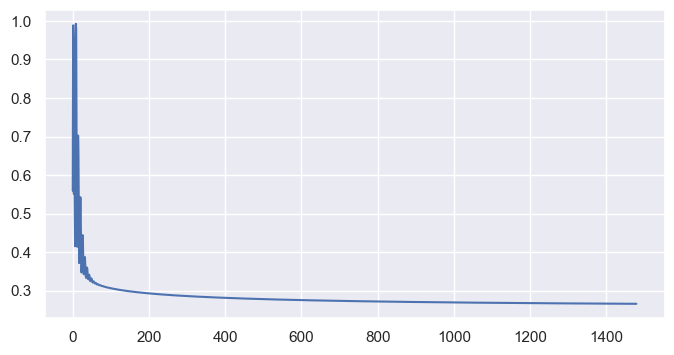

In [51]:
plot_optimal_loss_history(momentum_loss_history)

### Adam

In [52]:
adam_lr_loss_history, adam_df = start_lr_seach(lambda_values=lambda_values, descent_name='adam')

21.52703683143676
21.51961813185585
21.51220085905232
21.50478503655434
21.497370687694392
21.48995783555938
21.482546502942462
21.47513671229719
21.467728485693936
21.460321844779358
21.452916810738586
21.44551340426084
21.438111645508197
21.43071155408801
21.423313149028704
21.415916448759216
21.408521471091927
21.40112823320916
21.39373675165303
21.386347042318587
21.378959120450205
21.371573000640865
21.364188696834347
21.356806222329947
21.34942558978975
21.342046811247908
21.334669898122073
21.32729486122649
21.319921710786677
21.312550456455376
21.30518110732971
21.297813671969156
21.290448158414353
21.28308457420639
21.275722926406527
21.26836322161614
21.261005465996774
21.253649665290144
21.246295824838054
21.238943949602007
21.231594044182536
21.224246112838138
21.216900159503698
21.209556187808424
21.20221420109324
21.194874202427517
21.187536194625235
21.180200180260485
21.17286616168228
21.165534141028775
21.158204120240743
21.15087610107443
21.1435500851138
21.1362260737

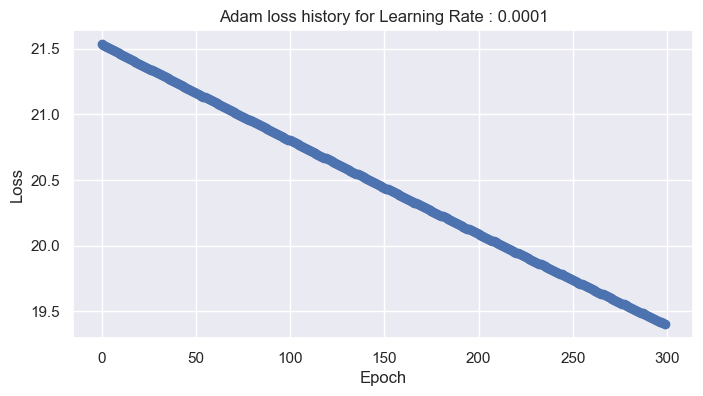

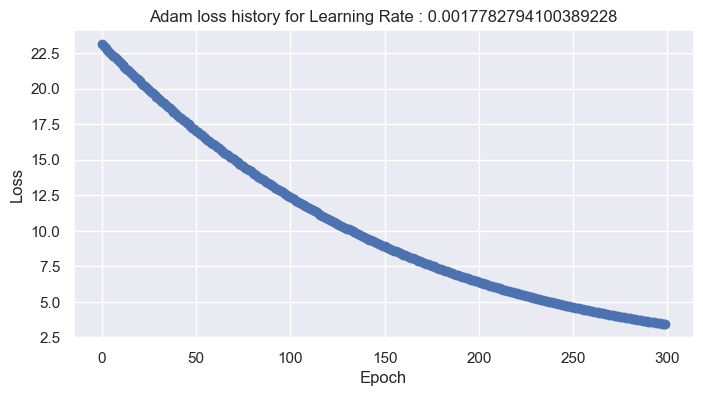

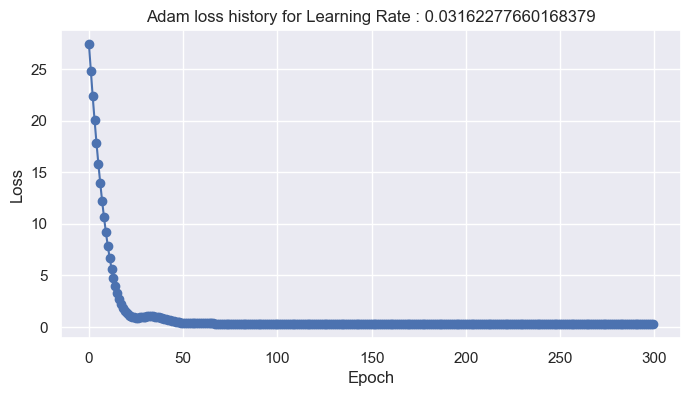

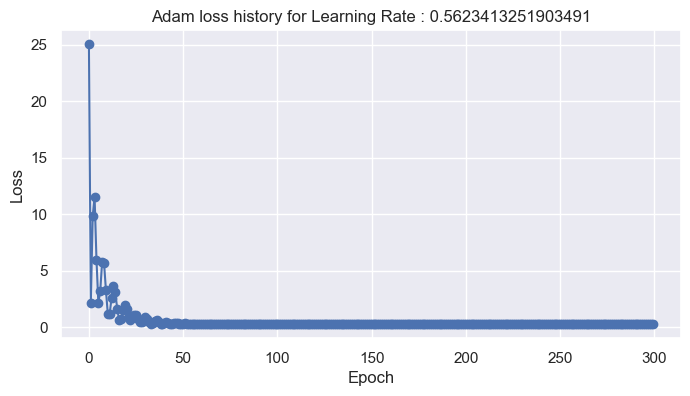

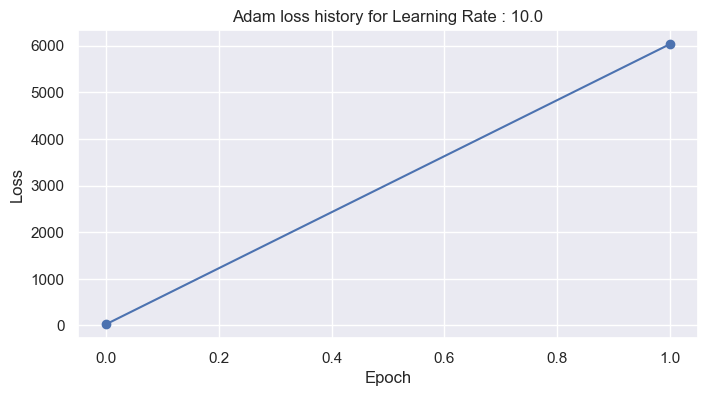

In [53]:
plot_loss_history(adam_lr_loss_history, descent_name='Adam')

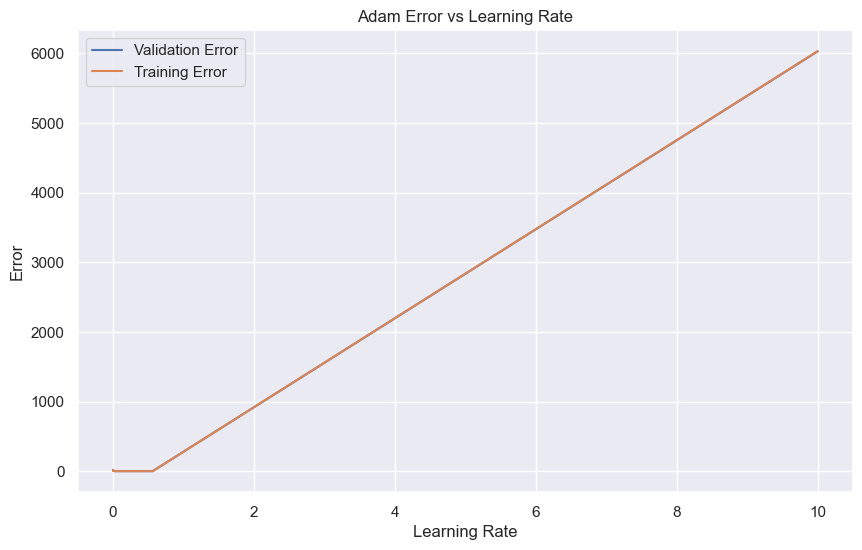

In [54]:
plot_err_vs_lr(adam_df, descent_name='Adam')

In [55]:
adam_df

Learning_Rate  Error_Trein  Error_Val    R2_Train      R2_Val  Iter_count
0        0.00010     19.40152   19.40539   -14.91561   -14.62066         300
1        0.00178      3.42550    3.43543    -1.81003    -1.76540         300
2        0.03162      0.26087    0.26358     0.78600     0.78782         300
3        0.56234      0.25791    0.26015     0.78843     0.79059         300
4       10.00000   6029.08980 6026.63829 -4944.83113 -4850.23279           2

In [56]:
adam_lr = 0.56234
adam_r2_train, adam_r2_val, adam_last_train_loss, adam_val_loss, adam_loss_history = get_train_result(lr=adam_lr, descent_name='adam', max_iter=iter_count, min_loss=0.26)

1.967438550840157
9.598866144375078
8.123890307307203
3.0418420455062036
1.9628311806913517
4.341118276571709
5.163926597955749
3.198339582511183
1.0327480546857077
0.9002196709473046
2.4082596090817763
3.392183198423854
2.684639296974473
1.1461745958899283
0.313933138791662
0.7584484067329847
1.662516150911764
1.9075804805589702
1.3118902422081151
0.6031697788733814
0.4664104467404
0.833661640409633
1.1033615183497816
0.9231816202732364
0.5414083617197509
0.40556576942274164
0.6039203141606078
0.8063624117469512
0.7180535884606892
0.4356448244228292
0.2836716960224697
0.39888250352806015
0.5873321039973722
0.5964644409075706
0.4241007193491879
0.2819316719578869
0.3092857197502615
0.41981598591501246
0.4479383601307298
0.3673915275813447
0.2948624955779816
0.31143966803036255
0.36298944101774294
0.3582077250169216
0.3018550883378884
0.27418200330875103
0.30606214899438167
0.3391485941334728
0.31892510015058784
0.2728638833491986
0.2624615682983214
0.2920885679505573
0.3105419342020596

In [57]:
print_params(adam_lr, adam_last_train_loss, adam_val_loss, adam_r2_train, adam_r2_val, len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.2593458740608829 
Ошибка на валидационной выборке = 0.26173340681703666 
R2_train = 0.7872513199366394 
R2_val = 0.7893137726576045 
Iter_count = 70



### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

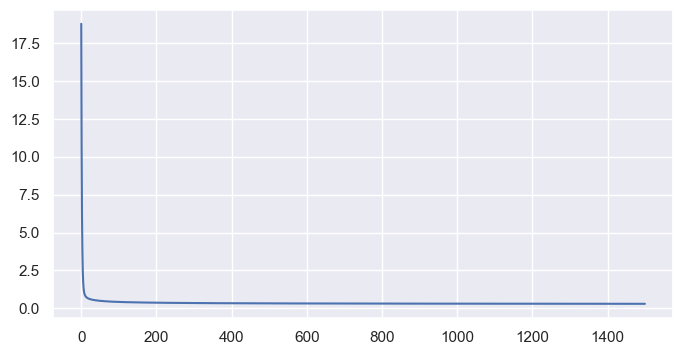

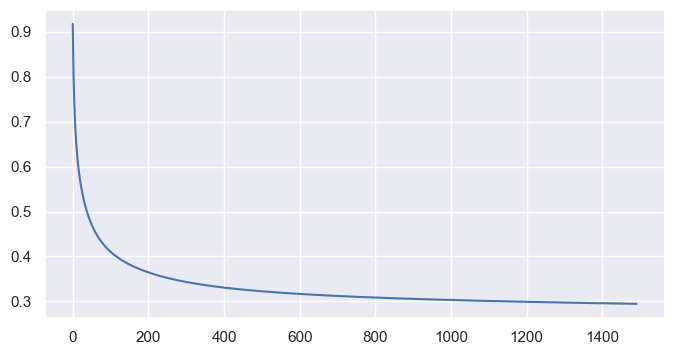

In [58]:
plot_optimal_loss_history(full_loss_history)

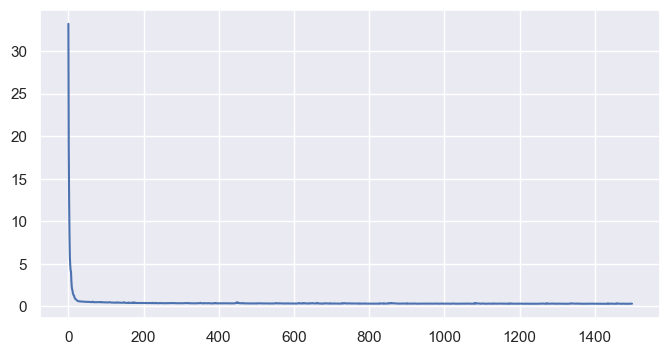

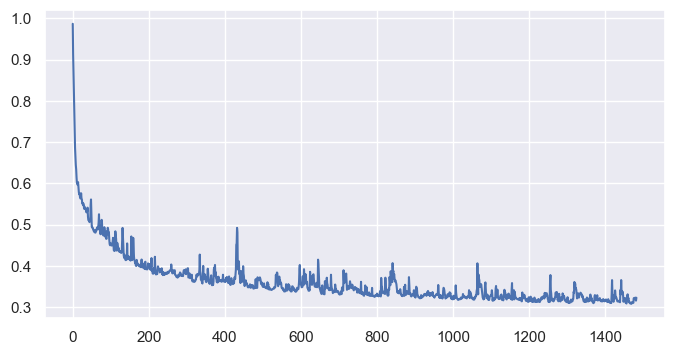

In [59]:
plot_optimal_loss_history(stochastic_loss_history)

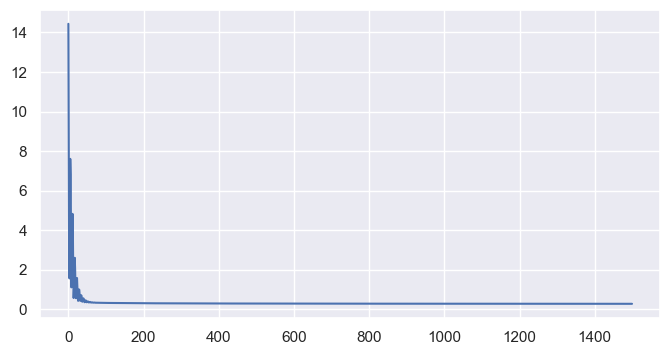

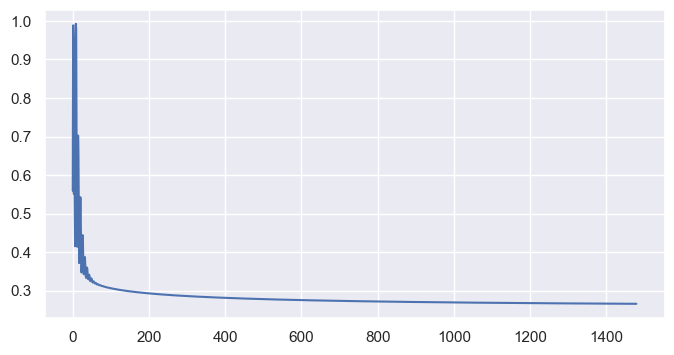

In [60]:
plot_optimal_loss_history(momentum_loss_history)

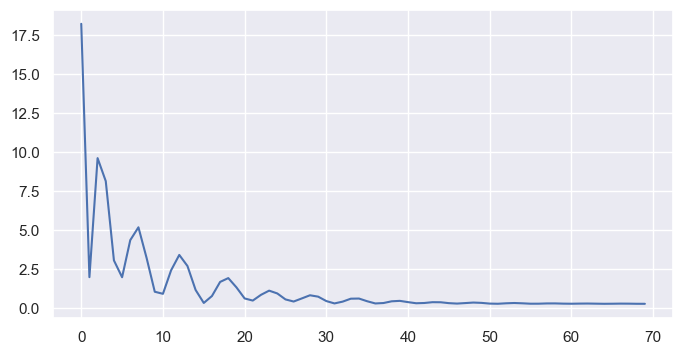

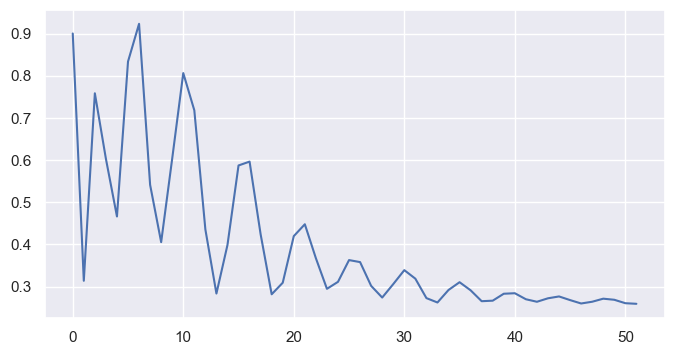

In [61]:
plot_optimal_loss_history(adam_loss_history)

In [62]:
print_params(full_lr, full_last_train_loss, full_val_loss, full_r2_train, full_r2_val, len(full_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2948008093732802 
Ошибка на валидационной выборке = 0.2968605094947237 
R2_train = 0.7581666440505924 
R2_val = 0.7610376850513926 
Iter_count = 1500



In [63]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, len(stochastic_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3231455972310917 
Ошибка на валидационной выборке = 0.32371512192141 
R2_train = 0.7349146211477344 
R2_val = 0.7394206624186039 
Iter_count = 1500



In [64]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, momentum_r2_train, momentum_r2_val, len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2661487441807746 
Ошибка на валидационной выборке = 0.2670388564432016 
R2_train = 0.7816707351523614 
R2_val = 0.7850430714900107 
Iter_count = 1500



In [65]:
print_params(adam_lr, adam_last_train_loss, adam_val_loss, adam_r2_train, adam_r2_val, len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.2593458740608829 
Ошибка на валидационной выборке = 0.26173340681703666 
R2_train = 0.7872513199366394 
R2_val = 0.7893137726576045 
Iter_count = 70



Выше представленны результаты работы 4х различных методов градиентного спуска. Быстрей всего до минимального значения MSE сходится Adam. 

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [66]:
import time

from matplotlib.pyplot import tick_params

batch_sizes = np.arange(10, 1000, 100)
columns = ['batch_size', 'time_result', 'iter_count', 'r2_train', 'r2_val', 'last_train_loss', 'val_loss']

sgd_res_df = pd.DataFrame(columns=columns)

for batch in batch_sizes:

    

    for k in range(10):
        start_time = time.perf_counter()  

        r2_train, r2_val, last_train_loss, val_loss, loss_history =  get_train_result(lr=stochastic_lr, descent_name='stochastic', batch_size=batch, min_loss=0.335)

        end_time = time.perf_counter() 
        time_result = end_time - start_time

        temp_dict = {
            'batch_size': batch, 
            'time_result': time_result, 
            'iter_count': len(loss_history), 
            'r2_train': r2_train, 
            'r2_val': r2_val, 
            'last_train_loss': last_train_loss, 
            'val_loss': val_loss
        }

        print(temp_dict)
        # Превращаем словарь в строку DataFrame и добавляем к основному DataFrame
        # Создаём временный DataFrame из словаря
        temp_df = pd.DataFrame([temp_dict])
        
        # Используем pd.concat для добавления строки
        sgd_res_df = pd.concat([sgd_res_df, temp_df], ignore_index=True)  

14.267735261170868
7.9520189525258775
4.670350268596272
2.636558410536862
1.8665814561098433
1.1161145679394524
0.8646630333027568
0.764192709375622
0.7392020737211773
0.7235364999118772
0.7252252275001594
0.7077676522148759
0.6970166294445469
0.6924368794243881
0.6631511811329012
0.6275026541107919
0.5915968144465727
0.592007867387346
0.5957207640601376
0.6118546143095998
0.5807715912877217
0.5851215819092319
0.5594884235749317
0.5510304926663733
0.5429086064052705
0.5300451631262433
0.5195446802580863
0.49803232470852793
0.49735593789185994
0.5012544008939919
0.5011559342463932
0.49250188306228126
0.48818878451049647
0.48603850544073485
0.49852396426474205
0.48415451757178074
0.4842004408446868
0.48180987720673807
0.48009822124361307
0.48926951346793474
0.48818558243226867
0.4806544227087972
0.4719630774510683
0.4679371981144465
0.473371142177542
0.4645655819308091
0.46314666820991884
0.4649730618657819
0.46447199615350465
0.46731354828137267
0.4703001943165273
0.46185584660897266
0.

In [67]:
sgd_res_df

batch_size  time_result iter_count  r2_train  r2_val  last_train_loss  \
0          10     33.36781        376   0.72639 0.72748          0.33354   
1          10     45.54740        500   0.68523 0.69017          0.38371   
2          10     44.34166        500   0.70870 0.71204          0.35510   
3          10     41.53261        500   0.69329 0.69623          0.37389   
4          10     43.26549        500   0.70565 0.70779          0.35883   
..        ...          ...        ...       ...     ...              ...   
95        910     24.94061        500   0.71841 0.72125          0.34327   
96        910     25.32812        486   0.72523 0.72610          0.33496   
97        910     24.63400        479   0.72526 0.72886          0.33492   
98        910     25.25290        498   0.72522 0.72869          0.33496   
99        910     33.02327        500   0.72310 0.72314          0.33755   

    val_loss  
0    0.33855  
1    0.38490  
2    0.35772  
3    0.37737  
4    0.36301  
..       ...  
95   0.34628  
96   0.34027  
97   0.33683  
98   0.33704  
99   0.34394  

[100 rows x 7 columns]

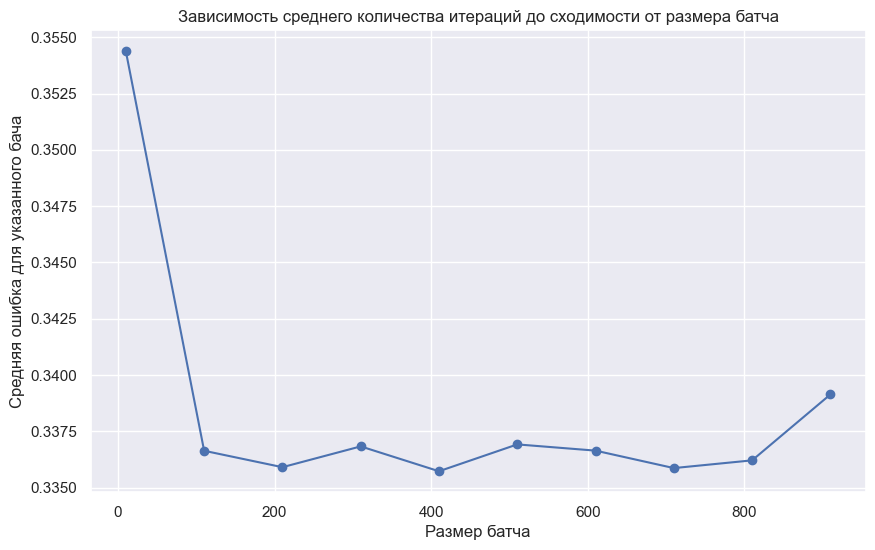

In [68]:
grouped_loss = sgd_res_df.groupby('batch_size')['last_train_loss'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_loss['batch_size'], grouped_loss['last_train_loss'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего количества итераций до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Средняя ошибка для указанного бача')
plt.grid(True)
plt.show()

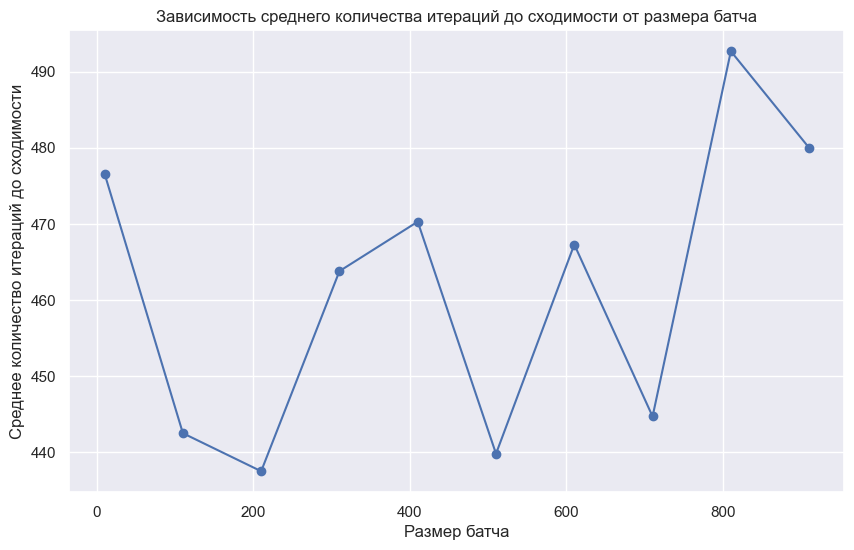

In [69]:
# Группируем по размеру батча и считаем среднее количество итераций
grouped_iter = sgd_res_df.groupby('batch_size')['iter_count'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_iter['batch_size'], grouped_iter['iter_count'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего количества итераций до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций до сходимости')
plt.grid(True)
plt.show()

In [70]:
grouped_iter

batch_size iter_count
0          10  476.60000
1         110  442.50000
2         210  437.50000
3         310  463.80000
4         410  470.30000
5         510  439.80000
6         610  467.30000
7         710  444.70000
8         810  492.70000
9         910  480.00000

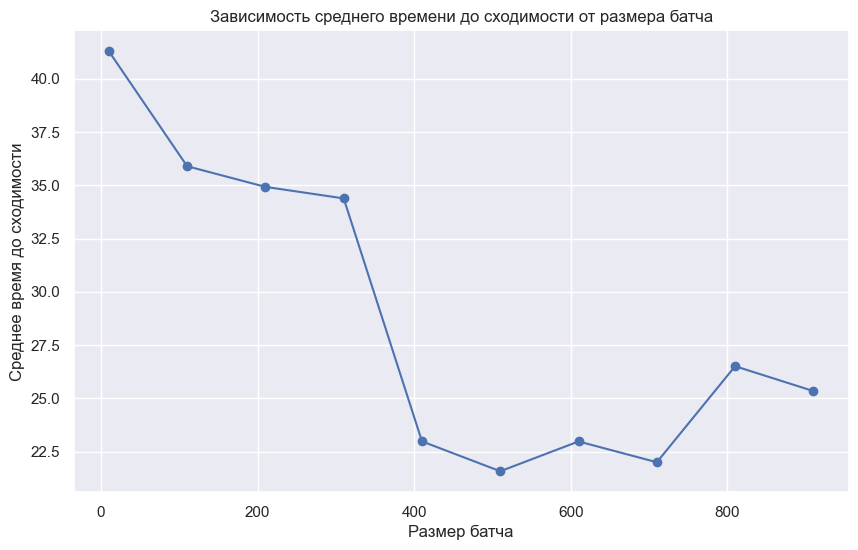

In [71]:
# Группируем по размеру батча и считаем среднее количество итераций
grouped_time = sgd_res_df.groupby('batch_size')['time_result'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_time['batch_size'], grouped_time['time_result'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время до сходимости')
plt.grid(True)
plt.show()

In [72]:
grouped_time

batch_size  time_result
0          10     41.28457
1         110     35.89252
2         210     34.92340
3         310     34.38306
4         410     22.98677
5         510     21.58582
6         610     22.98413
7         710     22.00772
8         810     26.51310
9         910     25.34620

Исходя из результатов по времени и количеству итераций опримальный размер бача находится в районе 500-700.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [73]:
mu_values = np.logspace(-4, 1, num=5)

### Full mu и lr анализ

In [74]:
full_mu_and_lr_loss, full_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='full', descent_reg=True)

20.66120886154981
20.63051271926671
20.599867449419467
20.569272965081566
20.53872917947666
20.508236005978347
20.47779335810991
20.447401149544007
20.417059294102486
20.386767705756082
20.356526298624146
20.326334986974423
20.29619368522277
20.266102307932915
20.236060769816188
20.206068985731275
20.176126870683945
20.14623433982682
20.1163913084591
20.08659769202632
20.056853406120094
20.027158366477845
19.997512488982586
19.967915689662643
19.938367884691406
19.90886899038707
19.879418923212413
19.850017599774507
19.820664936824492
19.791360851257338
19.76210526011155
19.73289808056896
19.703739229954472
19.674628625735792
19.645566185523204
19.616551827069323
19.58758546826882
19.558667027158208
19.52979642191558
19.500973570860367
19.47219839245308
19.4434708052951
19.414790728128395
19.386158079835294
19.35757277943824
19.32903474609956
19.3005438991212
19.272100157944504
19.24370344214993
19.215353671456892
19.18705076572343
19.15879464494601
19.130585229259292
19.1024224389359


In [75]:
full_mu_and_lr_df

Learning_Rate       Mu  Error_Trein    Error_Val      R2_Train  \
0         0.00010  0.00010     13.42929     13.46195     -10.01642   
1         0.00010  0.00178     14.11032     14.06364     -10.57509   
2         0.00010  0.03162     18.35171     18.34739     -14.05442   
3         0.00010  0.56234     11.51368     11.44744      -8.44499   
4         0.00010 10.00000     21.43546     21.39240     -16.58411   
5         0.00178  0.00010      0.95713      0.96557       0.21484   
6         0.00178  0.00178      0.73217      0.73492       0.39938   
7         0.00178  0.03162      0.70790      0.71596       0.41929   
8         0.00178  0.56234      0.79148      0.79499       0.35072   
9         0.00178 10.00000      7.15611      7.18083      -4.87036   
10        0.03162  0.00010      0.37815      0.38240       0.68979   
11        0.03162  0.00178      0.35410      0.35428       0.70952   
12        0.03162  0.03162      0.33506      0.33876       0.72514   
13        0.03162  0.56234      0.37310      0.38079       0.69393   
14        0.03162 10.00000      0.87308      0.89174       0.28379   
15        0.56234  0.00010   4750.31528   4744.27278   -3895.81660   
16        0.56234  0.00178   2559.45676   2555.87605   -2098.59402   
17        0.56234  0.03162   6306.33688   6297.65351   -5172.26467   
18        0.56234  0.56234   4448.04714   4441.59202   -3647.85758   
19        0.56234 10.00000  14469.84056  14349.55485  -11869.01525   
20       10.00000  0.00010 153417.09564 153128.57045 -125851.33798   
21       10.00000  0.00178 166627.40775 166244.59749 -136688.12679   
22       10.00000  0.03162 214741.86928 214381.89218 -176157.76639   
23       10.00000  0.56234 112284.58165 112031.32951  -92109.18538   
24       10.00000 10.00000  43255.72146  42772.10942  -35482.87912   

          R2_Val  Iter_count  
0       -9.83640         300  
1      -10.32074         300  
2      -13.76901         300  
3       -8.21479         300  
4      -16.22013         300  
5        0.22275         300  
6        0.40841         300  
7        0.42368         300  
8        0.36006         300  
9       -4.78032         300  
10       0.69218         300  
11       0.71482         300  
12       0.72731         300  
13       0.69348         300  
14       0.28218         300  
15   -3817.97346         300  
16   -2056.39072         300  
17   -5068.39055         300  
18   -3574.32604         300  
19  -11549.88917         300  
20 -123262.13710         300  
21 -133820.07958         300  
22 -172568.91617         300  
23  -90180.29724         300  
24  -34429.05033         300

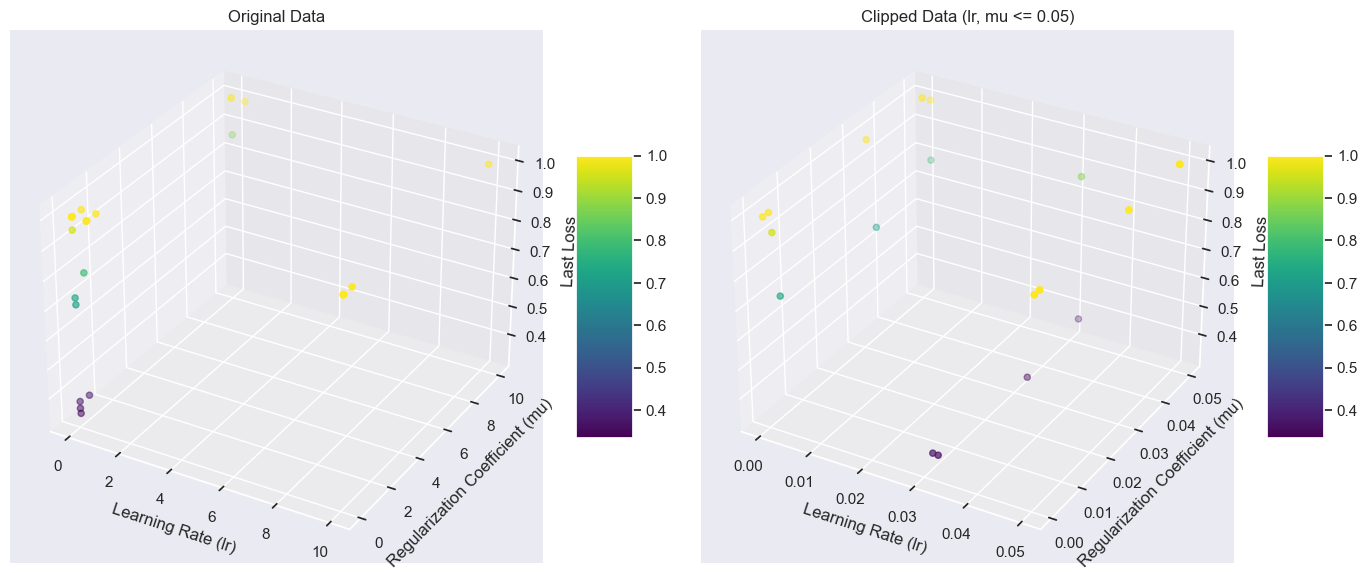

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_loss_mu_lr(list_of_dictionaries):
    # Первоначальный код для получения исходных данных
    lrs = [d['lr'] for d in list_of_dictionaries]
    mus = [d['mu'] for d in list_of_dictionaries]
    last_losses = [d['loss_history'][-1] for d in list_of_dictionaries]
    last_losses = np.clip(last_losses, None, 1)
    lrs = np.array(lrs)
    mus = np.array(mus)
    last_losses = np.array(last_losses)

    # Построение первого графика
    fig = plt.figure(figsize=(14, 6))

    # Первый график
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(lrs, mus, last_losses, c=last_losses, cmap='viridis')
    ax1.set_xlabel('Learning Rate (lr)')
    ax1.set_ylabel('Regularization Coefficient (mu)')
    ax1.set_zlabel('Last Loss')
    ax1.set_title('Original Data')
    fig.colorbar(scatter1, shrink=0.5, aspect=5)

    # Ограничение lr и mu значениями до 0.05
    lrs_clipped = np.clip(lrs, None, 0.05)
    mus_clipped = np.clip(mus, None, 0.05)

    # Второй график
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(lrs_clipped, mus_clipped, last_losses, c=last_losses, cmap='viridis')
    ax2.set_xlabel('Learning Rate (lr)')
    ax2.set_ylabel('Regularization Coefficient (mu)')
    ax2.set_zlabel('Last Loss')
    ax2.set_title('Clipped Data (lr, mu <= 0.05)')
    fig.colorbar(scatter2, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()
    
plot_3d_loss_mu_lr(full_mu_and_lr_loss)

In [77]:
full_mu_lr = 0.03162
full_mu = 0.03162

In [78]:
full_mu_r2_train, full_mu_r2_val, full_mu_last_train_loss, full_mu_val_loss, full_mu_loss_history = get_train_result(lr=full_mu_lr, descent_name='full', descent_reg=True, mu=full_mu, max_iter=iter_count, min_loss=0.26)

16.961857015820684
9.959639023766043
6.148119239564782
4.035370572945085
2.834066659907761
2.1273962835333373
1.6936388267872704
1.4140002257148894
1.224151911070266
1.0887173909623873
0.9878146681487712
0.9099374397054701
0.84817317405843
0.7981810002807089
0.7571002399016042
0.7229531169641682
0.6943114911027681
0.6701059272596622
0.649512509931521
0.6318829140900207
0.6166991589134758
0.6035429153098741
0.5920737449625695
0.5820130738085572
0.5731320236680278
0.5652419574050103
0.558187007831096
0.5518381030267034
0.5460881478916896
0.5408481149621241
0.5360438593546685
0.5316135155571949
0.5275053646911693
0.5236760839027951
0.5200893071474706
0.5167144403527436
0.5135256847856717
0.5105012311007797
0.5076225934957471
0.5048740590154618
0.5022422315949853
0.49971565412985025
0.4972844948737788
0.49494028692082775
0.4926757115360872
0.4904844177407107
0.4883608719012068
0.48630023217458734
0.48429824356469603
0.4823511500870771
0.4804556211495134
0.4786086897568804
0.476807700561765

In [79]:
print_params(full_mu_lr, full_mu_last_train_loss, full_mu_val_loss, full_mu_r2_train, full_mu_r2_val, iter_count=iter_count, mu=full_mu)
print_params(full_lr, full_last_train_loss, full_val_loss, full_r2_train, full_r2_val, iter_count=iter_count)

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.29579858179394614 
Ошибка на валидационной выборке = 0.29922880451480793 
R2_train = 0.7573481434044226 
R2_val = 0.7591312904910523 
Iter_count = 1500
mu = 0.03162 

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2948008093732802 
Ошибка на валидационной выборке = 0.2968605094947237 
R2_train = 0.7581666440505924 
R2_val = 0.7610376850513926 
Iter_count = 1500



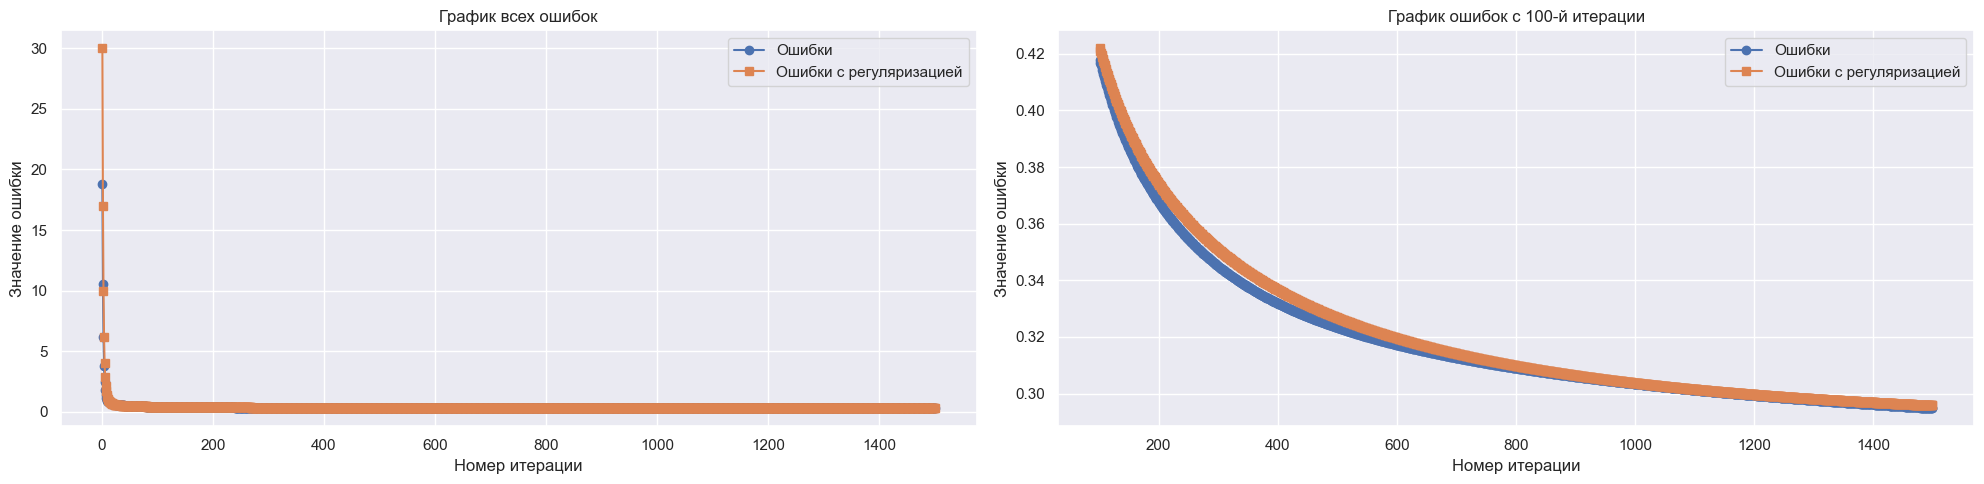

In [80]:
def plot_error_lines(errors, errors_mu, start_val: int = 100):
    """
    Функция для отображения двух линий ошибок на графике, а также второго графика
    с данными начиная с 100-й итерации.

    Параметры:
    - errors: Список значений ошибок для метода без регуляризации.
    - errors_mu: Список значений ошибок для метода с регуляризацией.
    """
    
    # Создаем фигуру и два подграфика (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    # Первый подграфик для всех данных
    axs[0].plot(range(1, len(errors) + 1), errors, label='Ошибки', marker='o')
    axs[0].plot(range(1, len(errors_mu) + 1), errors_mu, label='Ошибки с регуляризацией', marker='s')
    axs[0].set_title('График всех ошибок')
    axs[0].set_xlabel('Номер итерации')
    axs[0].set_ylabel('Значение ошибки')
    axs[0].legend()

    
    axs[1].plot(range(start_val + 1, len(errors) + 1), errors[start_val:], label='Ошибки', marker='o')
    axs[1].plot(range(start_val + 1, len(errors_mu) + 1), errors_mu[start_val:], label='Ошибки с регуляризацией', marker='s')
    axs[1].set_title('График ошибок с {}-й итерации'.format(start_val))
    axs[1].set_xlabel('Номер итерации')
    axs[1].set_ylabel('Значение ошибки')
    axs[1].legend()


    plt.tight_layout()
    plt.show()

plot_error_lines(full_loss_history, full_mu_loss_history)

### Stochastic mu lr

In [81]:
stochastic_mu_and_lr_loss, stochastic_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='stochastic', 
                                                                           descent_reg=True, batch_size=batch_size)

18.327927901646383
18.294218670447318
18.26929760388485
18.237954042182793
18.21378740416821
18.177666891700405
18.14890899644614
18.105856813389114
18.08633788410548
18.063732354028335
18.024138526194815
18.000823700356445
17.970033528660295
17.941214388356233
17.91645170629464
17.880235534607813
17.849638815362145
17.809989969695774
17.78839651568121
17.759521572101203
17.733800523852274
17.6997936529594
17.679682213362856
17.65254461552075
17.62013503862419
17.587292890249756
17.557948731134484
17.52956350862053
17.511139795570042
17.475993689645705
17.445640287038024
17.416728110810023
17.38731704664746
17.35559308576905
17.334726404160822
17.31176041737766
17.279644429312746
17.243152927214
17.216688112511648
17.182173350870247
17.159191569432448
17.13504910018297
17.11293132818898
17.087636125940563
17.062010306440044
17.03382945627516
17.014336413924863
16.981853558011334
16.954708780390863
16.92919597298739
16.901811004024427
16.875264263911504
16.850722864592377
16.82235981872

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

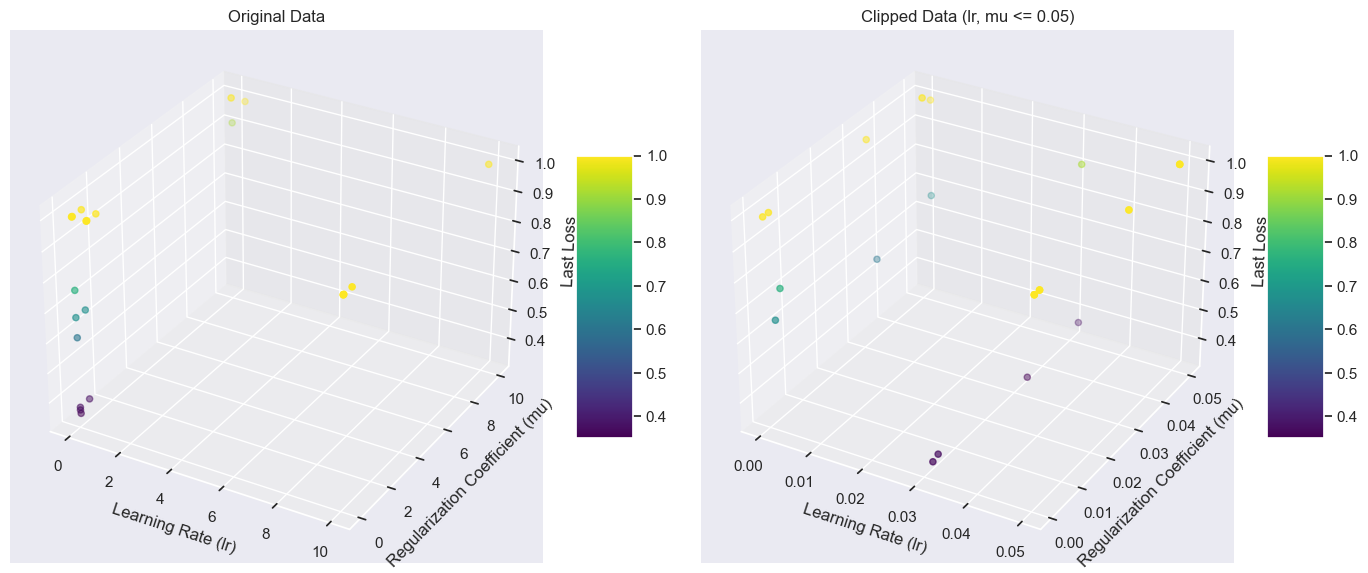

In [82]:
plot_3d_loss_mu_lr(stochastic_mu_and_lr_loss)

In [83]:
stochastic_mu_and_lr_df

Learning_Rate       Mu  Error_Trein    Error_Val      R2_Train  \
0         0.00010  0.00010     11.71943     11.64668      -8.61378   
1         0.00010  0.00178      9.45062      9.44208      -6.75261   
2         0.00010  0.03162     17.49334     17.52184     -13.35027   
3         0.00010  0.56234      9.85130      9.88504      -7.08129   
4         0.00010 10.00000     20.38183     20.33066     -15.71978   
5         0.00178  0.00010      0.67382      0.67370       0.44724   
6         0.00178  0.00178      0.76332      0.77087       0.37383   
7         0.00178  0.03162      0.60570      0.61689       0.50312   
8         0.00178  0.56234      0.67424      0.67474       0.44690   
9         0.00178 10.00000      8.06119      8.08837      -5.61282   
10        0.03162  0.00010      0.36385      0.37141       0.70152   
11        0.03162  0.00178      0.37291      0.37770       0.69409   
12        0.03162  0.03162      0.35070      0.35624       0.71231   
13        0.03162  0.56234      0.37520      0.38192       0.69221   
14        0.03162 10.00000      0.91684      0.93677       0.24789   
15        0.56234  0.00010   2567.19340   2571.28938   -2104.94060   
16        0.56234  0.00178   3722.74920   3715.65779   -3052.87537   
17        0.56234  0.03162   4206.45888   4207.37098   -3449.67597   
18        0.56234  0.56234   5897.05812   5885.20924   -4836.52184   
19        0.56234 10.00000   1900.11180   1899.13334   -1557.71490   
20       10.00000  0.00010 212026.36922 211199.07130 -173930.16568   
21       10.00000  0.00178 148537.47319 148155.49847 -121848.44709   
22       10.00000  0.03162 195484.93252 195226.36355 -160360.76213   
23       10.00000  0.56234  96639.10369  96635.74998  -79274.76187   
24       10.00000 10.00000  68134.57292  67738.04255  -55891.69738   

          R2_Val  Iter_count  
0       -8.37517         300  
1       -6.60055         300  
2      -13.10447         300  
3       -6.95711         300  
4      -15.36547         300  
5        0.45770         300  
6        0.37948         300  
7        0.50342         300  
8        0.45686         300  
9       -5.51085         300  
10       0.70103         300  
11       0.69597         300  
12       0.71324         300  
13       0.69257         300  
14       0.24593         300  
15   -2068.79792         300  
16   -2989.97441         300  
17   -3385.78631         300  
18   -4736.38736         300  
19   -1527.73584         300  
20 -170006.85681         300  
21 -119258.98829         300  
22 -157149.38640         300  
23  -77787.39483         300  
24  -54525.75226         300

In [84]:
stochastic_mu_lr = 0.03162
stochastic_mu = 0.03162

In [85]:

stochastic_mu_r2_train, stochastic_mu_r2_val, stochastic_mu_last_train_loss, stochastic_mu_val_loss, stochastic_mu_loss_history = get_train_result(lr=stochastic_mu_lr, descent_name='stochastic', descent_reg=True, mu=stochastic_mu, batch_size=batch_size, max_iter=iter_count, min_loss=0.26)

6.938090717648197
5.217422420639496
3.8845912220212164
2.8024325098836
2.6674859501121424
2.298695317728141
2.1363574628079487
1.6698547703284985
1.362357605963078
1.2425979182564317
1.0986134861227432
1.0755829091784466
0.985703037556487
0.9358357824061435
0.8819469025276809
0.8139208889468774
0.7657513486077732
0.7695067548365717
0.7070294091348356
0.672596757671434
0.6862971877023494
0.6735522637553812
0.6422362602655429
0.6366345436652294
0.6407796981894213
0.6268189161857799
0.6152980582268865
0.6208624849660072
0.6531187927674477
0.6581509767263677
0.6379426532095723
0.5936100003902094
0.5908743147921279
0.5891507125295845
0.6021777840380358
0.5933791531032538
0.597203904894644
0.6196051350923573
0.6009515702157016
0.6192963092669383
0.6840516548167429
0.7367104401089457
0.6592225102197053
0.6291141602380422
0.5904510116664178
0.568619149226876
0.5585807022162448
0.5484551700072461
0.550245381723505
0.5362347861723723
0.5279857773873394
0.5251766322648405
0.5118918392043795
0.509

In [86]:
print_params(stochastic_mu_lr, stochastic_mu_last_train_loss, stochastic_mu_val_loss, stochastic_mu_r2_train, stochastic_mu_r2_val, 
             iter_count=len(stochastic_mu_loss_history), mu=stochastic_mu, batch_sizes=batch_size)
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, iter_count=len(stochastic_loss_history), batch_sizes=batch_size)

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.29936618098447393 
Ошибка на валидационной выборке = 0.30272580292663515 
R2_train = 0.7544215419247255 
R2_val = 0.7563163292242804 
Iter_count = 1500
mu = 0.03162 
Batch_size = 10 

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3231455972310917 
Ошибка на валидационной выборке = 0.32371512192141 
R2_train = 0.7349146211477344 
R2_val = 0.7394206624186039 
Iter_count = 1500
Batch_size = 10 



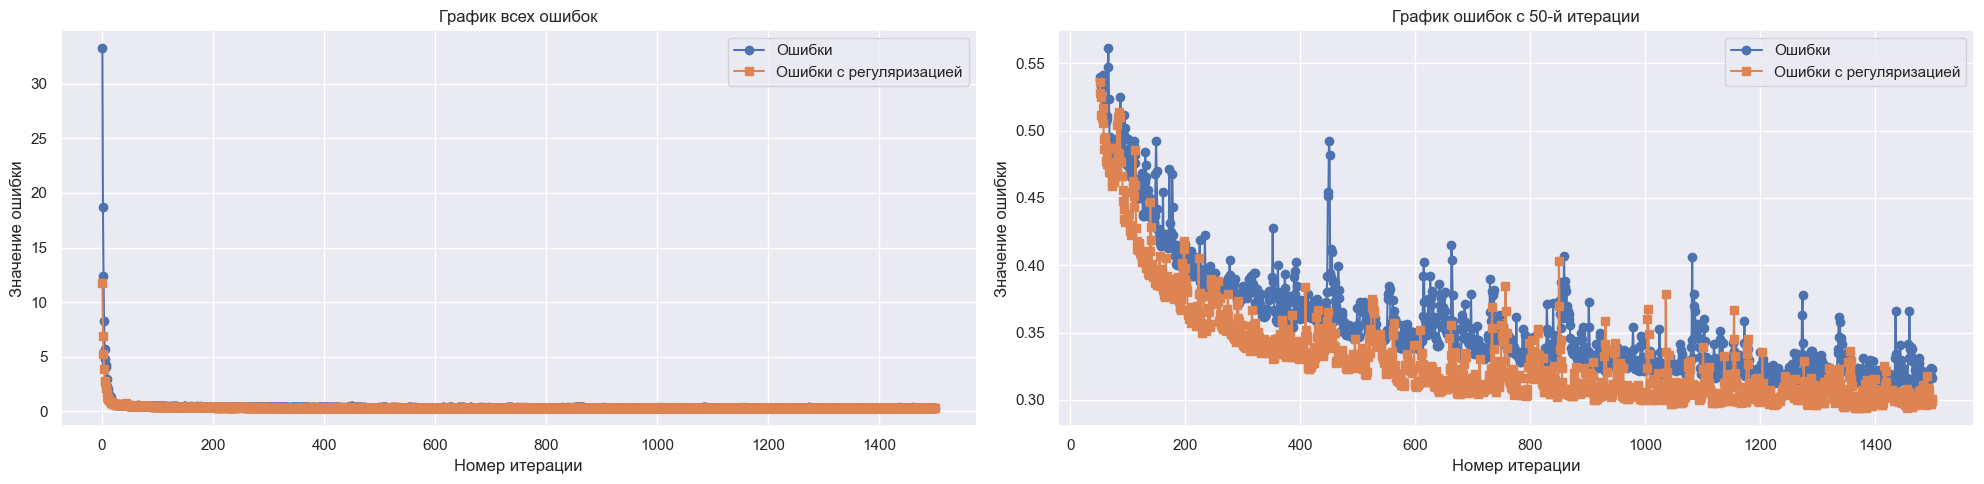

In [87]:
plot_error_lines(stochastic_loss_history, stochastic_mu_loss_history, 50)

### Momentum lr mu  

In [88]:
momentum_mu_and_lr_loss, momentum_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='momentum', descent_reg=True)

19.727771567785602
19.671628582567486
19.59176386692022
19.49077955299786
19.371066254574334
19.234814058672676
19.08402422292018
18.920521192381944
18.745964643372886
18.561861336497245
18.369576620494033
18.170345475306757
17.965283019539378
17.7553944360629
17.541584291591704
17.324665242854977
17.105366134601915
16.88433950395818
16.66216851229033
16.439373330297798
16.216417004992728
15.993710838911468
15.77161931262336
15.550464581595232
15.330530577923213
15.112066746503691
14.8952914440017
14.680395027577188
14.467542658821635
14.25687684679173
14.048519752447177
13.842575275236625
13.639130941051828
13.438259609303103
13.240021015468601
13.044463164144556
12.851623586375881
12.661530473879681
12.47420370168639
12.289655749714395
12.107892532860427
11.928914148327404
11.752715548119385
11.579287143906758
11.408615350798836
11.24068307595233
11.075470157388281
10.9129537578832
10.753108718338535
10.595907874612926
10.441322341419768
10.289321766546577
10.139874558338073
9.992948

In [89]:
momentum_mu_and_lr_df

Learning_Rate       Mu  Error_Trein    Error_Val      R2_Train  \
0         0.00010  0.00010      1.32774      1.32482      -0.08918   
1         0.00010  0.00178      1.23611      1.24357      -0.01402   
2         0.00010  0.03162      1.07624      1.08147       0.11713   
3         0.00010  0.56234      1.44141      1.44035      -0.18243   
4         0.00010 10.00000     10.23226     10.25812      -7.39381   
5         0.00178  0.00010      0.39354      0.39834       0.67717   
6         0.00178  0.00178      0.40850      0.41301       0.66490   
7         0.00178  0.03162      0.37932      0.38419       0.68884   
8         0.00178  0.56234      0.42172      0.42886       0.65405   
9         0.00178 10.00000      0.87310      0.89176       0.28378   
10        0.03162  0.00010      0.28900      0.29116       0.76292   
11        0.03162  0.00178      0.28477      0.28642       0.76639   
12        0.03162  0.03162      0.28898      0.29224       0.76294   
13        0.03162  0.56234      0.36228      0.37104       0.70281   
14        0.03162 10.00000      0.87297      0.89163       0.28387   
15        0.56234  0.00010   2338.29491   2336.08963   -1917.16877   
16        0.56234  0.00178   3095.75500   3092.27869   -2538.53449   
17        0.56234  0.03162   2542.93074   2540.55131   -2085.03727   
18        0.56234  0.56234   1215.43896   1214.38383    -996.05860   
19        0.56234 10.00000  37600.47879  37395.76390  -30843.72526   
20       10.00000  0.00010 164879.78242 164571.48203 -135254.50081   
21       10.00000  0.00178 125666.51772 125405.48784 -103086.76212   
22       10.00000  0.03162 173101.38235 172697.17914 -141998.90937   
23       10.00000  0.56234  86085.92168  85912.73169  -70617.69126   
24       10.00000 10.00000  36990.99073  36984.74084  -30343.74515   

          R2_Val  Iter_count  
0       -0.06643         300  
1       -0.00103         300  
2        0.12946         300  
3       -0.15943         300  
4       -7.25743         300  
5        0.67935         300  
6        0.66754         300  
7        0.69074         300  
8        0.65478         300  
9        0.28217         300  
10       0.76563         300  
11       0.76944         300  
12       0.76476         300  
13       0.70132         300  
14       0.28227         300  
15   -1879.47035         300  
16   -2488.17606         300  
17   -2044.05484         300  
18    -976.53646         300  
19  -30101.28045         300  
20 -132473.28022         300  
21 -100946.02637         300  
22 -139014.18186         300  
23  -69155.74059         300  
24  -29770.42128         300

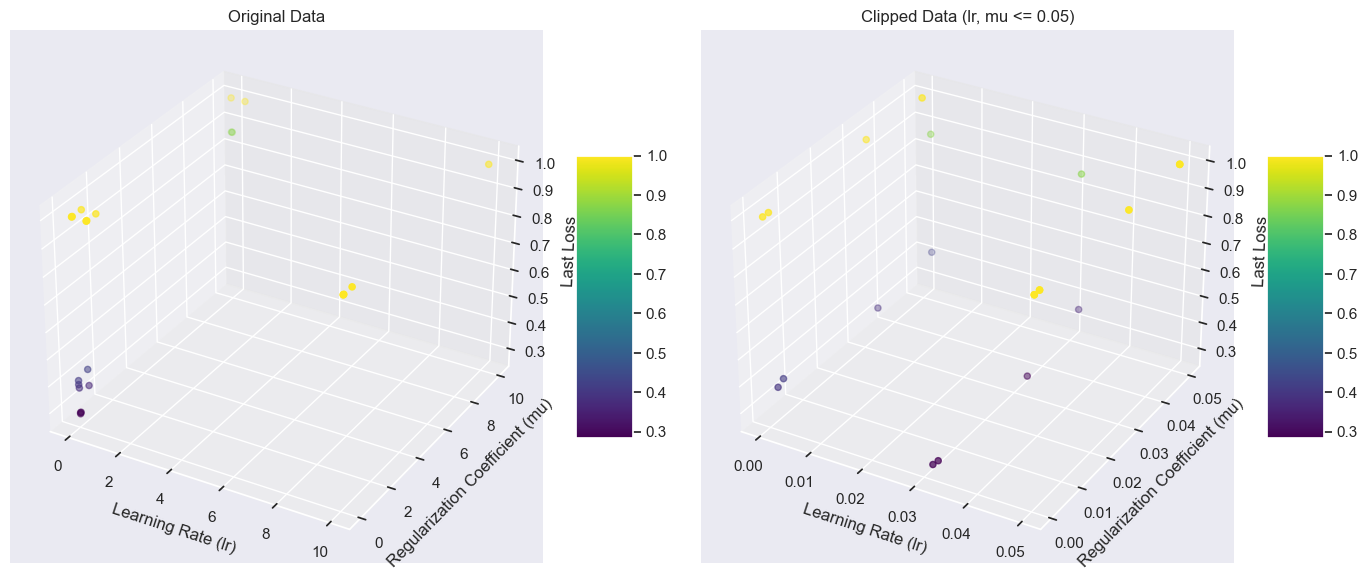

In [90]:
plot_3d_loss_mu_lr(momentum_mu_and_lr_loss)

In [91]:
momentum_mu_lr = 0.03162
momentum_mu = 0.00178

In [92]:

momentum_mu_r2_train, momentum_mu_r2_val, momentum_mu_last_train_loss, momentum_mu_val_loss, momentum_mu_loss_history = get_train_result(lr=momentum_mu_lr, descent_name='momentum', descent_reg=True, mu=momentum_mu, max_iter=iter_count, min_loss=0.26)

15.141584084689866
4.285659693155186
2.418697700991662
8.06041610230542
13.024979953148646
11.710809598083019
6.003642207481994
1.9054043400653147
2.7857026677769676
6.495716578438997
8.443466573684855
6.521995143134238
2.7407775845596003
0.571971401462829
1.3664967172357454
3.4716522409382273
4.389750408007429
3.319013131258124
1.5598986551621414
0.8166652893822731
1.4514997166419643
2.39382598285666
2.4710151301395813
1.589143072321405
0.6372766917024082
0.44478975954008754
0.9823549727045481
1.5393648855234556
1.5266969693181391
1.0134320474441765
0.5307429673714033
0.47207589857076554
0.7450856093762792
0.9611725432249452
0.8735436473124719
0.5903501447128744
0.39936506275918043
0.4497322148833937
0.628697851242924
0.7175420261004033
0.6232151487277434
0.44634763188353
0.34965296320403244
0.3909076313941637
0.4881789666548494
0.5255460875873462
0.4704396073305635
0.3873658747526684
0.35519976159604355
0.3871112301241088
0.4304047941104024
0.43099784340170505
0.387263330889918
0.342

In [93]:
# Печать параметров для градиентного спуска с моментом и регуляризацией
print_params(momentum_mu_lr, momentum_mu_last_train_loss, momentum_mu_val_loss, 
             momentum_mu_r2_train, momentum_mu_r2_val, iter_count=len(momentum_mu_loss_history), 
             mu=momentum_mu)

# Печать параметров для градиентного спуска с моментом без регуляризации
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, 
             momentum_r2_train, momentum_r2_val, iter_count=len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2671529529662107 
Ошибка на валидационной выборке = 0.26860319920939507 
R2_train = 0.7808469545760048 
R2_val = 0.7837838303419747 
Iter_count = 1500
mu = 0.00178 

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2661487441807746 
Ошибка на валидационной выборке = 0.2670388564432016 
R2_train = 0.7816707351523614 
R2_val = 0.7850430714900107 
Iter_count = 1500



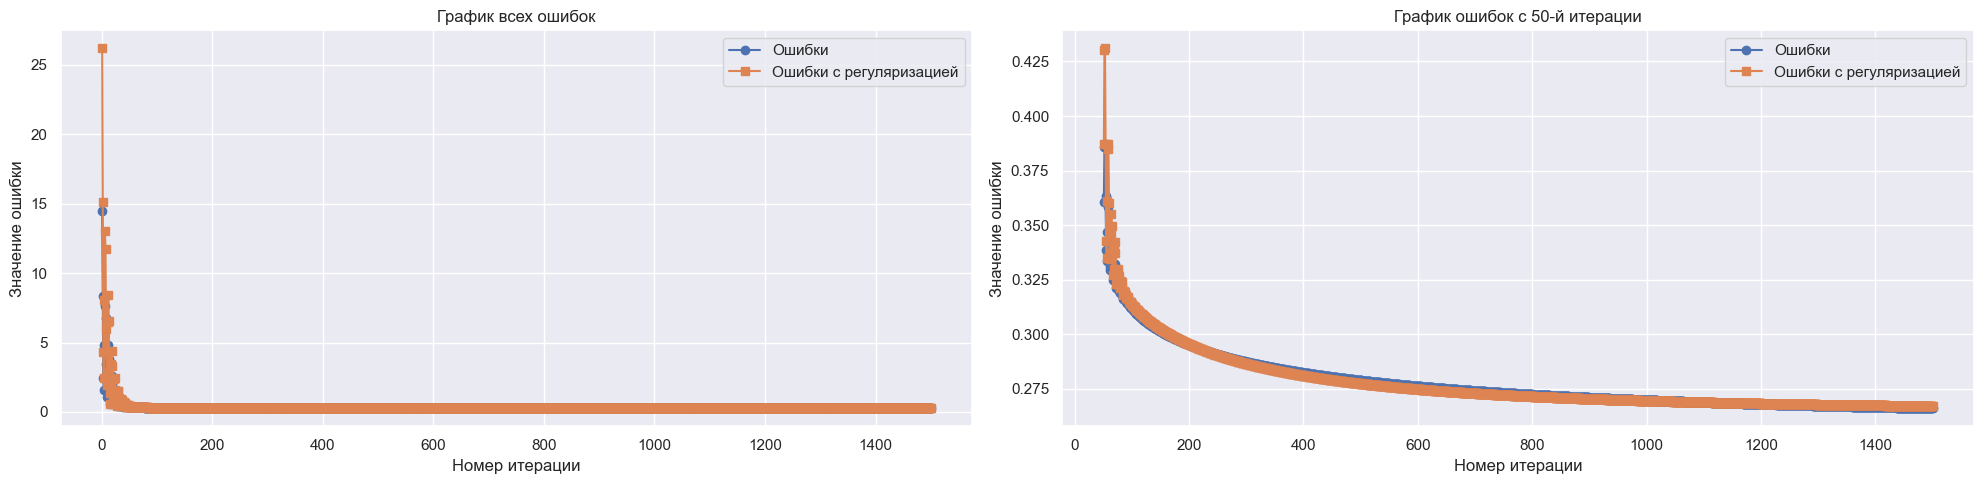

In [94]:
plot_error_lines(momentum_loss_history, momentum_mu_loss_history, 50)

### Adam lr mu

In [95]:
adam_mu_and_lr_loss, adam_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='adam', descent_reg=True) 

22.562337241053203
22.554632338050975
22.546928861841785
22.53922683596654
22.53152628377172
22.523827228359348
22.51612969253895
22.508433698781474
22.500739269175934
22.493046425388577
22.485355188625253
22.477665579596856
22.46997761848815
22.46229132493008
22.454606717975587
22.44692381607894
22.439242637078717
22.431563198184172
22.423885515965104
22.416209606344953
22.4085354845971
22.40086316534422
22.39319266256028
22.385523989575404
22.377857159082915
22.370192183148745
22.362529073222735
22.35486784015174
22.34720849419425
22.339551045036323
22.33189550180874
22.324241873104924
22.31659016699971
22.308940391068646
22.30129255240766
22.293646657653014
22.286002713001306
22.278360724229483
22.27072069671473
22.263082635454044
22.25544654508359
22.247812429897593
22.240180293866782
22.23255014065627
22.22492197364294
22.21729579593223
22.209671610374205
22.202049419579108
22.194429225932144
22.186811031607668
22.17919483858272
22.171580648649808
22.163968463429168
22.15635828438

In [96]:
adam_mu_and_lr_df

Learning_Rate       Mu  Error_Trein  Error_Val    R2_Train      R2_Val  \
0         0.00010  0.00010     20.35167   20.37378   -15.69505   -15.40018   
1         0.00010  0.00178     26.09990   26.01025   -20.41048   -19.93734   
2         0.00010  0.03162     19.92790   19.84426   -15.34741   -14.97394   
3         0.00010  0.56234     18.78226   18.73486   -14.40762   -14.08091   
4         0.00010 10.00000     22.17852   22.12635   -17.19366   -16.81093   
5         0.00178  0.00010      3.32110    3.29675    -1.72440    -1.65377   
6         0.00178  0.00178      3.13681    3.12398    -1.57322    -1.51469   
7         0.00178  0.03162      3.43532    3.40730    -1.81809    -1.74276   
8         0.00178  0.56234      7.10084    7.08079    -4.82502    -4.69979   
9         0.00178 10.00000     19.75439   19.75314   -15.20508   -14.90059   
10        0.03162  0.00010      0.26343    0.26583     0.78390     0.78602   
11        0.03162  0.00178      0.26904    0.27130     0.77930     0.78161   
12        0.03162  0.03162      0.30855    0.31275     0.74689     0.74825   
13        0.03162  0.56234      0.45190    0.45866     0.62929     0.63080   
14        0.03162 10.00000      1.55823    1.57731    -0.27826    -0.26968   
15        0.56234  0.00010      0.25858    0.26056     0.78788     0.79026   
16        0.56234  0.00178      0.26579    0.26721     0.78197     0.78490   
17        0.56234  0.03162      0.28834    0.29152     0.76346     0.76534   
18        0.56234  0.56234      0.36231    0.37108     0.70278     0.70130   
19        0.56234 10.00000      0.87308    0.89174     0.28379     0.28218   
20       10.00000  0.00010   6042.77708 6031.29623 -4956.05919 -4853.98226   
21       10.00000  0.00178   6090.19219 6077.27536 -4994.95513 -4890.99386   
22       10.00000  0.03162   5699.89581 5700.82580 -4674.78408 -4587.96514   
23       10.00000  0.56234   3664.19984 3657.95937 -3004.84569 -2943.52920   
24       10.00000 10.00000      0.87308    0.89174     0.28379     0.28218   

    Iter_count  
0          300  
1          300  
2          300  
3          300  
4          300  
5          300  
6          300  
7          300  
8          300  
9          300  
10         300  
11         300  
12         300  
13         300  
14         300  
15         300  
16         300  
17         300  
18         300  
19         300  
20         300  
21         300  
22         300  
23         300  
24         300

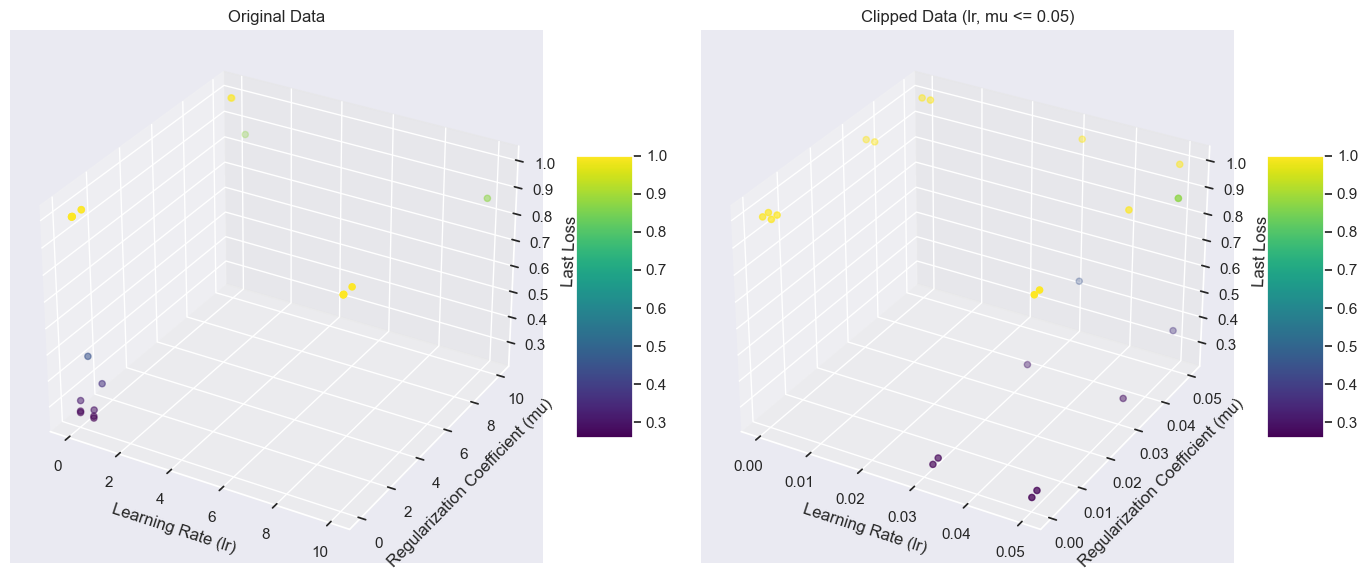

In [97]:
plot_3d_loss_mu_lr(adam_mu_and_lr_loss)

In [98]:
adam_mu_lr = 0.56234
adam_mu = 0.00010

In [99]:

adam_mu_r2_train, adam_mu_r2_val, adam_mu_last_train_loss, adam_mu_val_loss, adam_mu_loss_history = get_train_result(lr=adam_mu_lr, descent_name='adam', descent_reg=True, mu=adam_mu, max_iter=iter_count, min_loss=0.257)

2.314482586872801
9.526470463839997
8.205961736360813
3.211687796133163
2.183163139089022
4.716759676396055
5.603915999549126
3.4663260780979916
1.0045846328825974
0.6680461828661868
2.2234557172956064
3.4672170940990688
3.006455698274043
1.5074958799349307
0.4925820140953836
0.6947015451110414
1.4895550233537194
1.8035166044440463
1.3485256906041774
0.7327634525428919
0.6032305842918817
0.928356438805315
1.1510675055424933
0.9281255538544327
0.5022983789220377
0.3390616597368914
0.5641752086391882
0.8502344612882724
0.8365200819010291
0.5438966427397942
0.30089715471445033
0.3305329710530753
0.5137710827340539
0.5855988434831544
0.4732214604051147
0.34105165395738024
0.3392068583574991
0.41942105223001763
0.43640919590686256
0.3569858881723292
0.2879139360128095
0.31345616762323963
0.38175109247475203
0.38703303989599014
0.31837822013728867
0.2649442870134949
0.2846875736293854
0.3317570620994992
0.33467670457489906
0.2957363812496098
0.2718700132340051
0.2855348831651989
0.3017805335

In [100]:
# Печать параметров для градиентного спуска с Adam и регуляризацией
print_params(adam_mu_lr, adam_mu_last_train_loss, adam_mu_val_loss, 
             adam_mu_r2_train, adam_mu_r2_val, iter_count=len(adam_mu_loss_history), 
             mu=adam_mu)

# Печать параметров для градиентного спуска с Adam без регуляризации
print_params(adam_lr, adam_last_train_loss, adam_val_loss, 
             adam_r2_train, adam_r2_val, iter_count=len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.27193297896037105 
Ошибка на валидационной выборке = 0.2732837535935486 
R2_train = 0.7769257654512169 
R2_val = 0.7800161479621799 
Iter_count = 1500
mu = 0.0001 

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.2593458740608829 
Ошибка на валидационной выборке = 0.26173340681703666 
R2_train = 0.7872513199366394 
R2_val = 0.7893137726576045 
Iter_count = 70



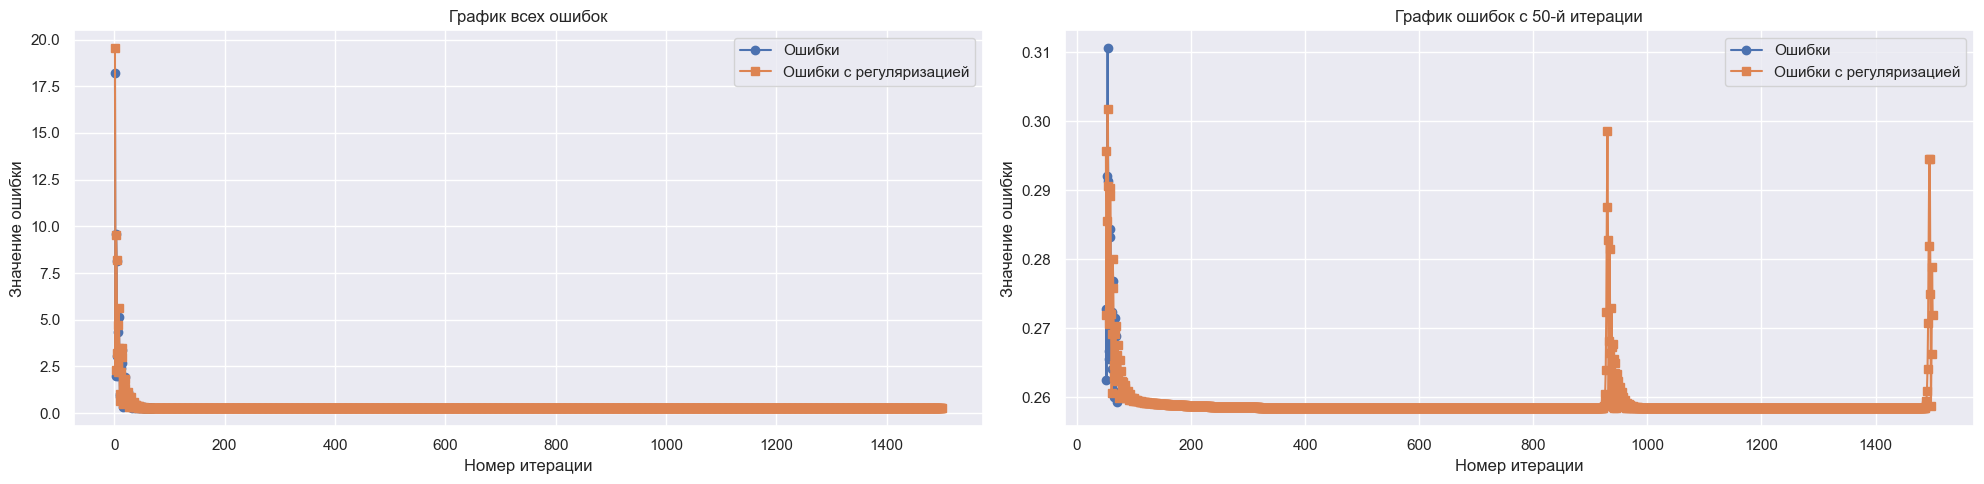

In [119]:
plot_error_lines(adam_loss_history, adam_mu_loss_history, 50)

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

Давайте найдем производную функции потерь $L(y, a)$ по $a$, используя данную формулу:
$$
    L(y, a)
    =
    \log(\cosh(a - y)).
$$

Шаги дифференцирования:

1. **Найдем внешнюю производную** функции относительно $a$, используя цепное правило. Внешняя функция здесь — это $\log(z)$, где $z = \cosh(a - y)$. Производная $\log(z)$ по $z$ равна $\frac{1}{z}$.
   
   Таким образом, внешняя производная будет:
   $$
   \frac{d}{dz} \log(z) = \frac{1}{z} = \frac{1}{\cosh(a - y)}.
   $$

2. **Найдем внутреннюю производную** функции относительно $a$. Внутренняя функция здесь — это $\cosh(a - y)$, где $a - y$ является аргументом функции косинуса гиперболического.

   Производная $\cosh(x)$ по $x$ равна $\sinh(x)$. Поэтому, производная $\cosh(a - y)$ по $a$ равна $\sinh(a - y)$.

3. **Применим цепное правило**, умножив внешнюю производную на внутреннюю. Итак, производная $L(y, a)$ по $a$ равна:
   $$
   \frac{dL}{da} = \frac{1}{\cosh(a - y)} \cdot \sinh(a - y).
   $$

4. **Упрощение выражения**. Данное выражение уже достаточно простое и представляет собой итоговую производную функции потерь по $a$.

Итак, производная функции потерь $L(y, a)$ по $a$ равна:
$$
\frac{dL}{da} = \frac{\sinh(a - y)}{\cosh(a - y)}.
$$

Это выражение также можно упростить, зная, что $\frac{\sinh(x)}{\cosh(x)} = \tanh(x)$, получим:
$$
\frac{dL}{da} = \tanh(a - y).
$$

Это окончательный результат дифференцирования заданной функции потерь.

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [102]:
adam_logcosh_r2_train, adam_logcosh_r2_val, adam_logcosh_last_train_loss, adam_logcosh_val_loss, adam_logcosh_loss_history = get_train_result(loss_function=LossFunction.LogCosh, 
                                                                                                                     lr=adam_mu_lr, descent_name='adam')

0.3296126341864792
2.5495088628699345
2.5591139265654066
1.3284741919765282
0.5897112012722818
1.178848701573233
1.3416079321790353
0.8765562568111649
0.5913307953612421
0.720748539031494
0.9027113536803344
0.6479092143339028
0.23291907253273067
0.4256779526318319
0.7102537423535427
0.5986290529944831
0.21808391708347138
0.18217448440378134
0.4542189427300778
0.4770493410856975
0.26909603247684355
0.16268082545812254
0.27799488609163053
0.305136297441331
0.2092705028091074
0.19237654282558128
0.2586629834880774
0.21512231172404903
0.1295988884240836
0.18382919362436634
0.23562003435092052
0.16670567730676655
0.10495371012009216
0.16609902978573335
0.19264686506783188
0.1355300914602107
0.11758075855509358
0.15430729308013347
0.14357490035049722
0.11645707559179885
0.1337268652698664
0.13788464150166527
0.1113467909443005
0.11866963619716657
0.13454584914554374
0.11427249852502609
0.10612880192886626
0.12390823663833164
0.1183040155151239
0.10476106188150086
0.11401403125818457
0.115539

In [103]:
# Печать параметров для градиентного спуска с Adam с функцией потель LogCosh
print_params(adam_mu_lr, adam_logcosh_last_train_loss, adam_logcosh_val_loss, 
             adam_logcosh_r2_train, adam_logcosh_r2_val, iter_count=len(adam_logcosh_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.10150432345764421 
Ошибка на валидационной выборке = 0.10237113477561773 
R2_train = 0.780547728288447 
R2_val = 0.7826597128969434 
Iter_count = 500



In [104]:
# Печать параметров для градиентного спуска с Adam
print_params(adam_lr, adam_last_train_loss, adam_val_loss, 
             adam_r2_train, adam_r2_val, iter_count=len(adam_loss_history))

Параметры:
lambda_ = 0.56234 
Ошибка на тренировочной выборке = 0.2593458740608829 
Ошибка на валидационной выборке = 0.26173340681703666 
R2_train = 0.7872513199366394 
R2_val = 0.7893137726576045 
Iter_count = 70



In [105]:
momentum_logcosh_r2_train, momentum_logcosh_r2_val, momentum_logcosh_last_train_loss, momentum_logcosh_val_loss, momentum_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=momentum_mu_lr, descent_name='momentum')

4.5361717270787025
4.280513915468273
3.918096551911976
3.4645302711653914
2.9413260766702654
2.3839304659806286
1.84960389318116
1.410345014197374
1.1225858612203237
0.9979045476866536
1.0033554644641287
1.0856951320647932
1.1945410886435832
1.2908322158570484
1.3457065888784894
1.3391275484427676
1.2607344692280387
1.1112406140088693
0.9035763960059243
0.6649105025564653
0.4390920426608482
0.28164191429720725
0.23382477615399214
0.2882116808798452
0.39239518847877125
0.4894693935858741
0.5447774889761283
0.5473248452450054
0.5030210586074275
0.428913107841508
0.348406833861088
0.28507084901693724
0.25434239753002236
0.25697946683172534
0.28005649187413256
0.30523329613673356
0.3175584127898678
0.3100389574200111
0.2841718062342696
0.24813561141893092
0.21345363146291987
0.19048109830908255
0.18406463764101977
0.19181617012873717
0.20622329098368253
0.21887506010068436
0.223987479754435
0.2198804400149532
0.20862786941600645
0.19457793685232266
0.18238957931214178
0.17522480497755483
0

In [106]:
print_params(momentum_mu_lr, momentum_logcosh_last_train_loss, momentum_logcosh_val_loss, 
             momentum_logcosh_r2_train, momentum_logcosh_r2_val, iter_count=len(momentum_logcosh_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.11450514574216906 
Ошибка на валидационной выборке = 0.11507046556201472 
R2_train = 0.7496862885170055 
R2_val = 0.7521410258263838 
Iter_count = 500



In [107]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, 
             momentum_r2_train, momentum_r2_val, iter_count=len(momentum_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2661487441807746 
Ошибка на валидационной выборке = 0.2670388564432016 
R2_train = 0.7816707351523614 
R2_val = 0.7850430714900107 
Iter_count = 1500



In [108]:
stochastic_logcosh_r2_train, stochastic_logcosh_r2_val, stochastic_logcosh_last_train_loss, stochastic_logcosh_val_loss, stochastic_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=stochastic_mu_lr, batch_size=batch_size,  descent_name='stochastic')

3.4799907697220864
3.349275488326125
3.216337977918183
3.0801561469217815
2.9523207072668773
2.8224784921607555
2.705133688858394
2.5807724044046054
2.496097856749097
2.3861327721545713
2.300928889710372
2.21647840069788
2.1015602942189333
2.0272255831407415
1.9395624093988117
1.84112909501499
1.7531451696701514
1.6885485544538963
1.6093884060511732
1.5392331787690525
1.4590318895014063
1.400947812616117
1.3575421059565893
1.3213845582693062
1.2643247248424156
1.2084899179639812
1.1558650902950862
1.112185656360625
1.0598375441745382
1.0166162817572446
0.9819924469128479
0.9366315933925109
0.8954943682581985
0.8713952736461186
0.8226952763444969
0.8025874544736235
0.7755157549324654
0.7690512184325202
0.7369815328420675
0.7096509779248347
0.6982294918258695
0.6781393039847333
0.6565085589288329
0.6436003069942894
0.6360012714765171
0.6115707975938075
0.6023712607955843
0.5867873093113537
0.5793839570414971
0.5698661885963585
0.5312816397614091
0.5194085426611971
0.49321401197202047
0.4

In [109]:
print_params(stochastic_mu_lr, stochastic_logcosh_last_train_loss, stochastic_logcosh_val_loss, 
             stochastic_logcosh_r2_train, stochastic_logcosh_r2_val, iter_count=len(stochastic_logcosh_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.14655627210916977 
Ошибка на валидационной выборке = 0.14876564528454908 
R2_train = 0.6784632345868793 
R2_val = 0.6769749630561954 
Iter_count = 500



In [110]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, iter_count=len(stochastic_loss_history), batch_sizes=batch_size)

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.3231455972310917 
Ошибка на валидационной выборке = 0.32371512192141 
R2_train = 0.7349146211477344 
R2_val = 0.7394206624186039 
Iter_count = 1500
Batch_size = 10 



In [111]:
full_logcosh_r2_train, full_logcosh_r2_val, full_logcosh_last_train_loss, full_logcosh_val_loss, full_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=full_mu_lr, descent_name='full')

3.7107620279645253
3.576337691214048
3.4423695282361524
3.308963504984638
3.1762469140484066
3.0443713420778065
2.9135155003242246
2.783887642280656
2.655727210358813
2.5293052854529923
2.404923379698275
2.282910137276516
2.1636156126856054
2.047402993834174
1.9346379248896117
1.8256759321260763
1.72084880813967
1.6204510879114713
1.524727875489952
1.4338652006743222
1.3479838000101636
1.2671367814762224
1.191311142770057
1.1204326716399116
1.0543734417042798
0.9929609651996704
0.9359880689394172
0.8832226844549599
0.834416937107693
0.7893151330288003
0.7476604400248812
0.7092002174412727
0.6736900627691673
0.6408967118887898
0.6105999631607868
0.5825938028866342
0.5566869002237086
0.5327026210151828
0.5104786876541278
0.48986658957771934
0.4707308282525517
0.4529480624320478
0.43640620422500975
0.4210035039371387
0.40664765141779174
0.39325491341749813
0.3807493199172215
0.3690619072490107
0.3581300218546029
0.34789668552841735
0.33831002080106803
0.32932273359963976
0.320891649348851

In [112]:
print_params(full_mu_lr, full_logcosh_last_train_loss, full_logcosh_val_loss, 
             full_logcosh_r2_train, full_logcosh_r2_val, iter_count=len(full_logcosh_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.14470121140263972 
Ошибка на валидационной выборке = 0.14617744933988394 
R2_train = 0.6895727355144037 
R2_val = 0.6903146340491417 
Iter_count = 500



In [113]:
print_params(full_lr, full_last_train_loss, full_val_loss, 
             full_r2_train, full_r2_val, iter_count=len(full_loss_history))

Параметры:
lambda_ = 0.03162 
Ошибка на тренировочной выборке = 0.2948008093732802 
Ошибка на валидационной выборке = 0.2968605094947237 
R2_train = 0.7581666440505924 
R2_val = 0.7610376850513926 
Iter_count = 1500



In [114]:
def plot_comparison_errors(full_errors, stochastic_errors, momentum_errors, adam_errors, start_val: int = 50):
    """
    Функция для отображения четырех линий ошибок на графике, представляющих различные
    методы оптимизации (полный градиентный спуск, стохастический градиентный спуск, 
    градиентный спуск с моментумом и Adam), а также второго графика с данными начиная
    с указанной итерации.

    Параметры:
    - full_errors: Список значений ошибок для полного градиентного спуска.
    - stochastic_errors: Список значений ошибок для стохастического градиентного спуска.
    - momentum_errors: Список значений ошибок для градиентного спуска с моментумом.
    - adam_errors: Список значений ошибок для оптимизатора Adam.
    - start_val: Итерация, с которой начинается второй график.
    """
    
    # Создаем фигуру и два подграфика (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    # Первый подграфик для всех данных
    axs[0].plot(range(1, len(full_errors) + 1), full_errors, label='Full Gradient Descent', marker='o')
    axs[0].plot(range(1, len(stochastic_errors) + 1), stochastic_errors, label='Stochastic Gradient Descent', marker='s')
    axs[0].plot(range(1, len(momentum_errors) + 1), momentum_errors, label='Momentum Gradient Descent', marker='^')
    axs[0].plot(range(1, len(adam_errors) + 1), adam_errors, label='Adam Optimizer', marker='x')
    axs[0].set_title('Comparison of Error Rates Across Methods')
    axs[0].set_xlabel('Iteration Number')
    axs[0].set_ylabel('Error Value')
    axs[0].legend()

    # Второй подграфик с указанной итерации
    axs[1].plot(range(start_val + 1, len(full_errors) + 1), full_errors[start_val:], label='Full Gradient Descent', marker='o')
    axs[1].plot(range(start_val + 1, len(stochastic_errors) + 1), stochastic_errors[start_val:], label='Stochastic Gradient Descent', marker='s')
    axs[1].plot(range(start_val + 1, len(momentum_errors) + 1), momentum_errors[start_val:], label='Momentum Gradient Descent', marker='^')
    axs[1].plot(range(start_val + 1, len(adam_errors) + 1), adam_errors[start_val:], label='Adam Optimizer', marker='x')
    axs[1].set_title('Comparison from the {}-th Iteration Onwards'.format(start_val))
    axs[1].set_xlabel('Iteration Number')
    axs[1].set_ylabel('Error Value')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

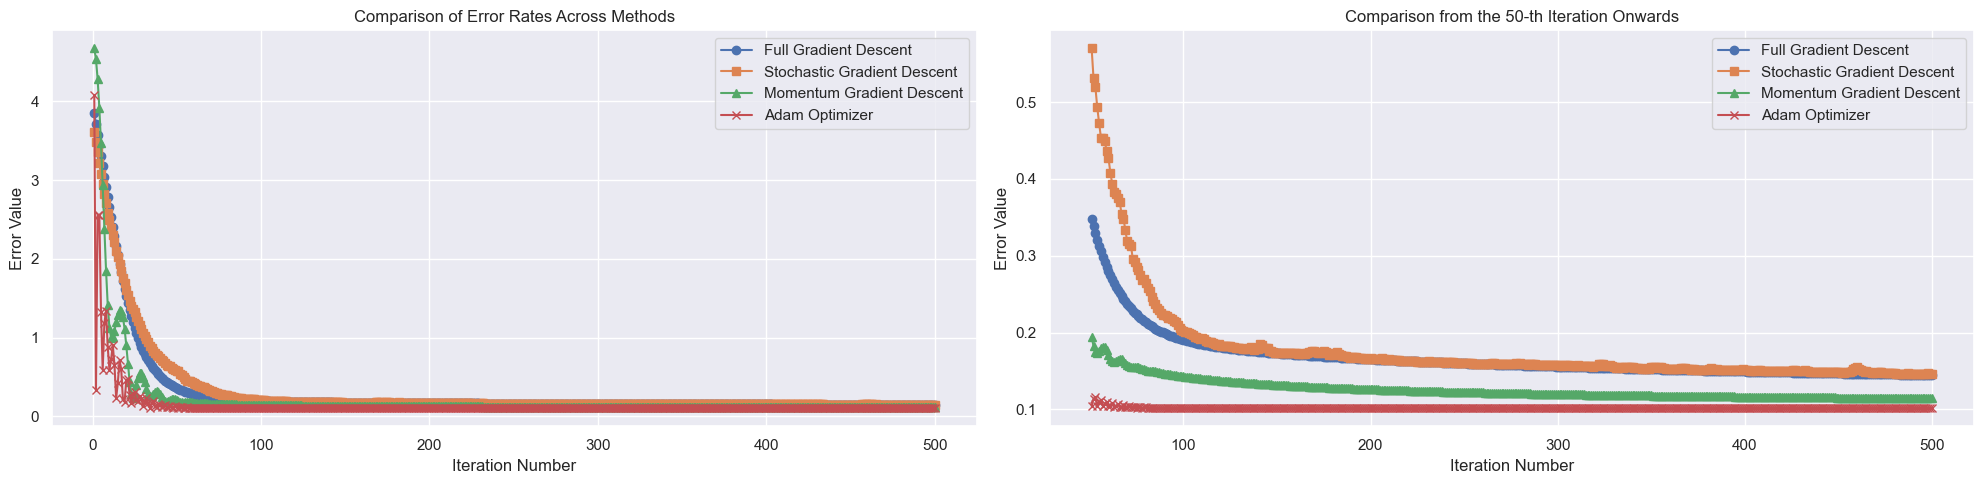

In [115]:
plot_comparison_errors(full_logcosh_loss_history, stochastic_logcosh_loss_history, momentum_logcosh_loss_history, adam_logcosh_loss_history, 50)

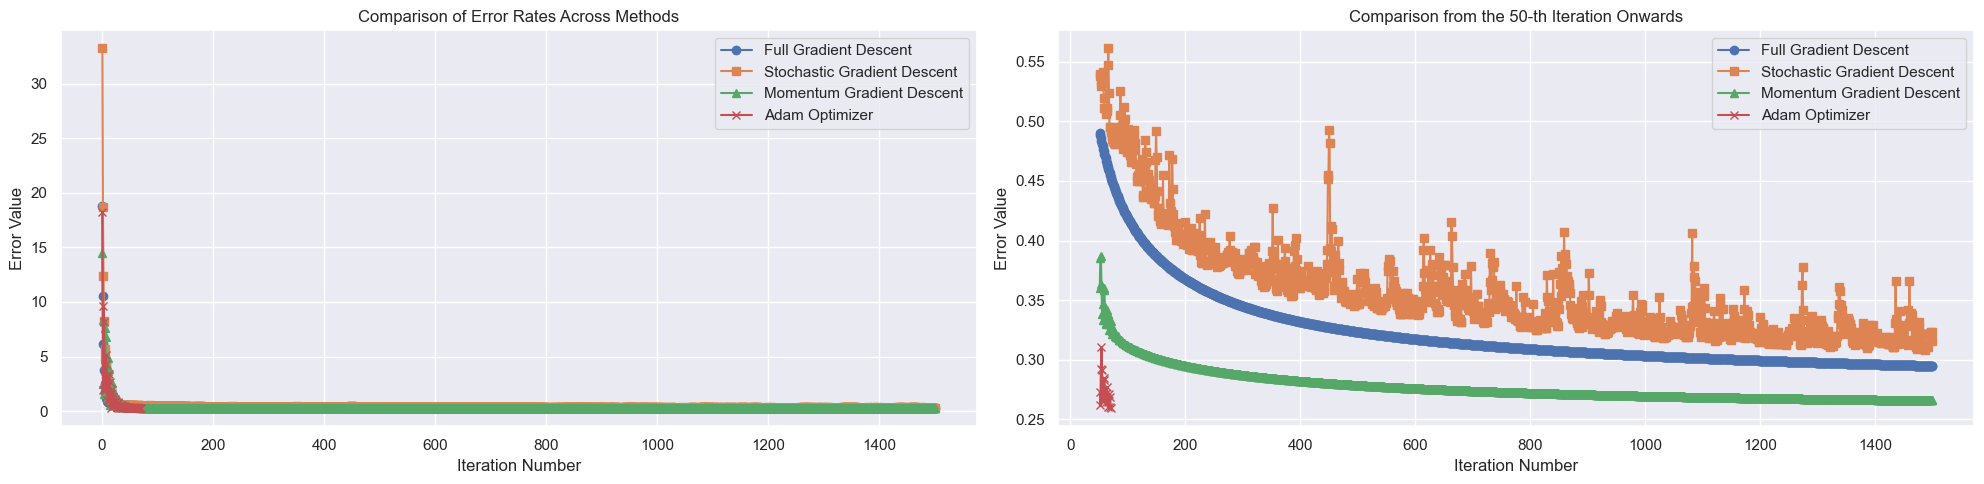

In [116]:
plot_comparison_errors(full_loss_history, stochastic_loss_history, momentum_loss_history, adam_loss_history, 50)

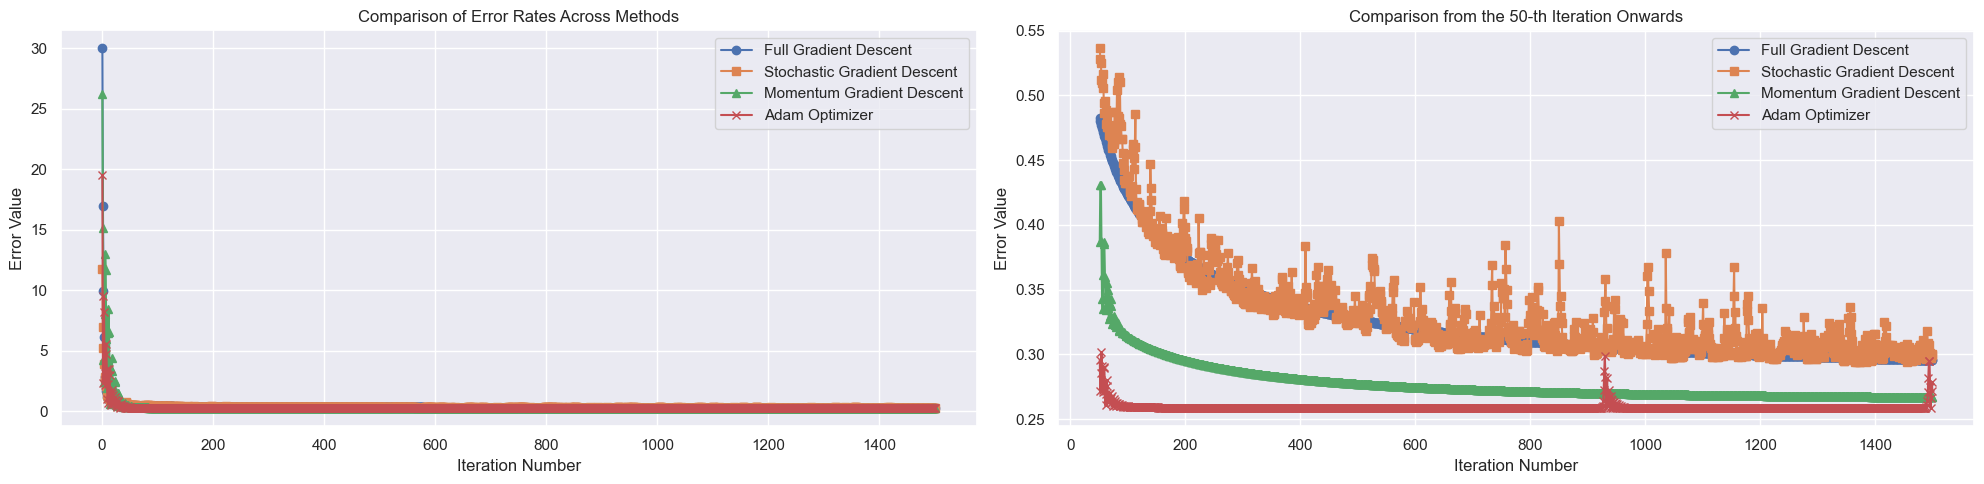

In [117]:
plot_comparison_errors(full_mu_loss_history, stochastic_mu_loss_history, momentum_mu_loss_history, adam_mu_loss_history, 50)